In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from numpy.linalg import inv

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
data_parent_path = r'h:\Shared drives\SLab\Multimode\experiment\240911'
print("Data Parent Path:", data_parent_path)
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Data Parent Path: h:\Shared drives\SLab\Multimode\experiment\240911
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from fitting.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# config

In [7]:
curr_path = os.getcwd()
config_file = expts_path+'\\config_rfsoc_ziqian.yml'
config_path = config_file
print('Config will be', config_path)


Config will be C:\_Lib\python\multimode_expts\config_rfsoc_ziqian.yml


In [8]:
qubit_i = 0
import yaml
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

# Exp path

In [9]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data'
expt_path_new = data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data


# Create a dataset

In [15]:
file_lists = [[ 66,  67,  68,  69,  70,  71,  72],
       [108, 109, 110, 111, 112, 113, 114],
       [ 73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86],
       [ 87,  88,  89,  90,  91,  92,  93],
       [ 94,  95,  96,  97,  98,  99, 100],
       [101, 102, 103, 104, 105, 106, 107]]
orig_idxs = [ 0,  1,  2,  3,  4,  5,  6]



Processing mode 1 with original index 0
00066_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -2.14604920733323, which is out of bounds 14.41190542181396 to 16.816650641447804. Instead init to 15.614278031630882
Attempted to init fitparam 4 to 15.614278031630882, which is out of bounds 16.45469164513448 to 22.521597649782407. Instead init to 19.488144647458444
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.022918298142955634 +/- 2.1964698329110824e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.051397960177
 	4984.097234556463
T2 Ramsey from fit I [us]: 252.13014275384742
Fit frequency from Q [MHz]: 0.023120935796666058 +/- 0.00017281156511449078
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.051195322523
 	4984.0974371941165
T2 Ramsey from fit Q [us]: 166.48769225600276
00067_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.488144647458444, which is out of bounds -12.198473861164215 to 9.204853564802546. Instead init to 

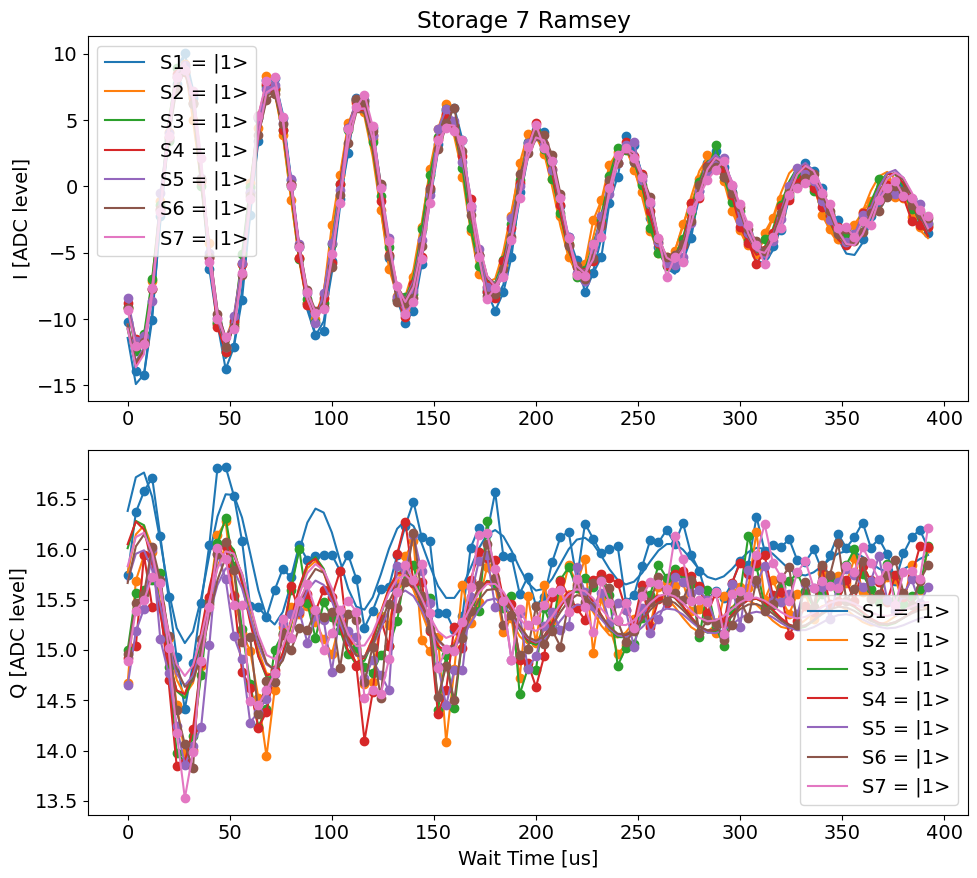

Processing mode 2 with original index 1
00108_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -5.037922531323066, which is out of bounds 13.616649797570851 to 16.226412221825065. Instead init to 14.921531009697958
Attempted to init fitparam 4 to 14.921531009697958, which is out of bounds 16.788917119071588 to 22.62718170631555. Instead init to 19.70804941269357
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.00802187319909915 +/- 1.0565425359176246e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.066294385121
 	4984.0823381315195
T2 Ramsey from fit I [us]: 544.1742131082829
Fit frequency from Q [MHz]: 0.008009197671147996 +/- 5.2542055351572046e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.066307060649
 	4984.082325455991
T2 Ramsey from fit Q [us]: 310.63885742402647
00109_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.70804941269357, which is out of bounds -17.267051176416732 to 6.684314412674901. Instead init to -5

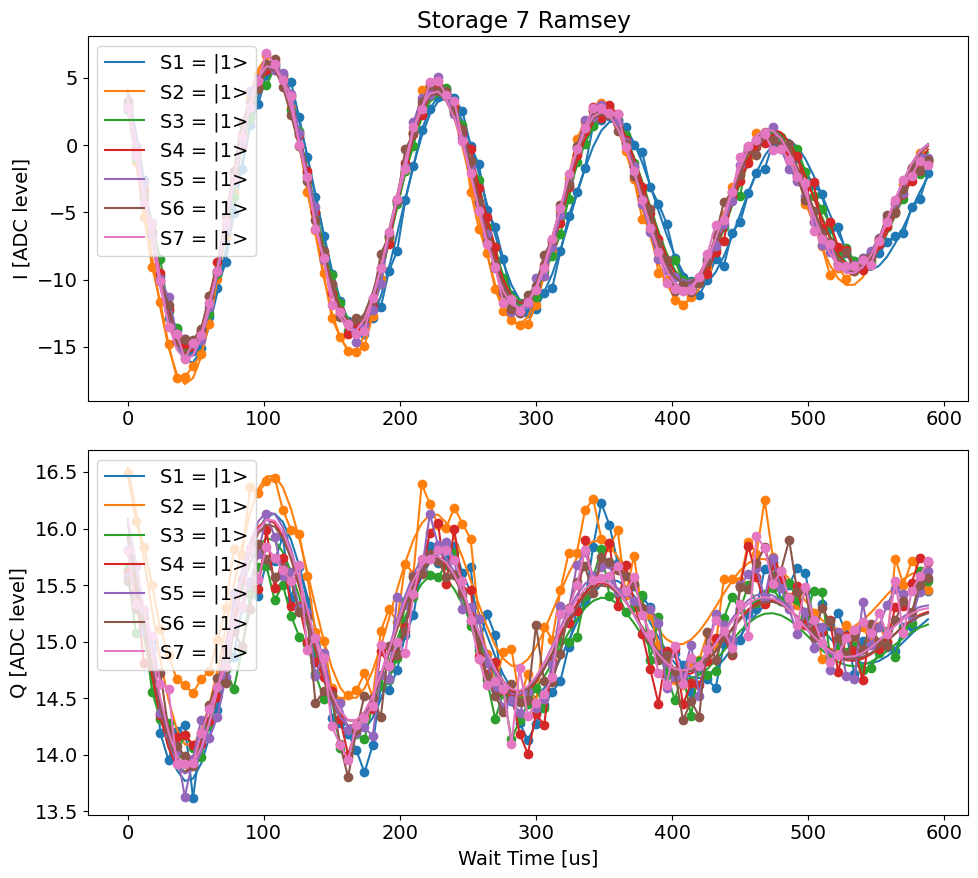

Processing mode 3 with original index 2
00073_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -2.085974319415594, which is out of bounds 13.899589918781322 to 16.061622521348966. Instead init to 14.980606220065145
Attempted to init fitparam 4 to 14.980606220065145, which is out of bounds 16.683935822056963 to 22.1719405632832. Instead init to 19.427938192670084
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.01078851216994111 +/- 8.650798348526422e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.063527746151
 	4984.08510477049
T2 Ramsey from fit I [us]: 768.4144503708854
Fit frequency from Q [MHz]: 0.010892067539478523 +/- 0.0003133001965856648
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.063424190781
 	4984.08520832586
T2 Ramsey from fit Q [us]: 176.40000000000003
00074_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.427938192670084, which is out of bounds -13.018750246713772 to 8.764937054773622. Instead init to -2.126

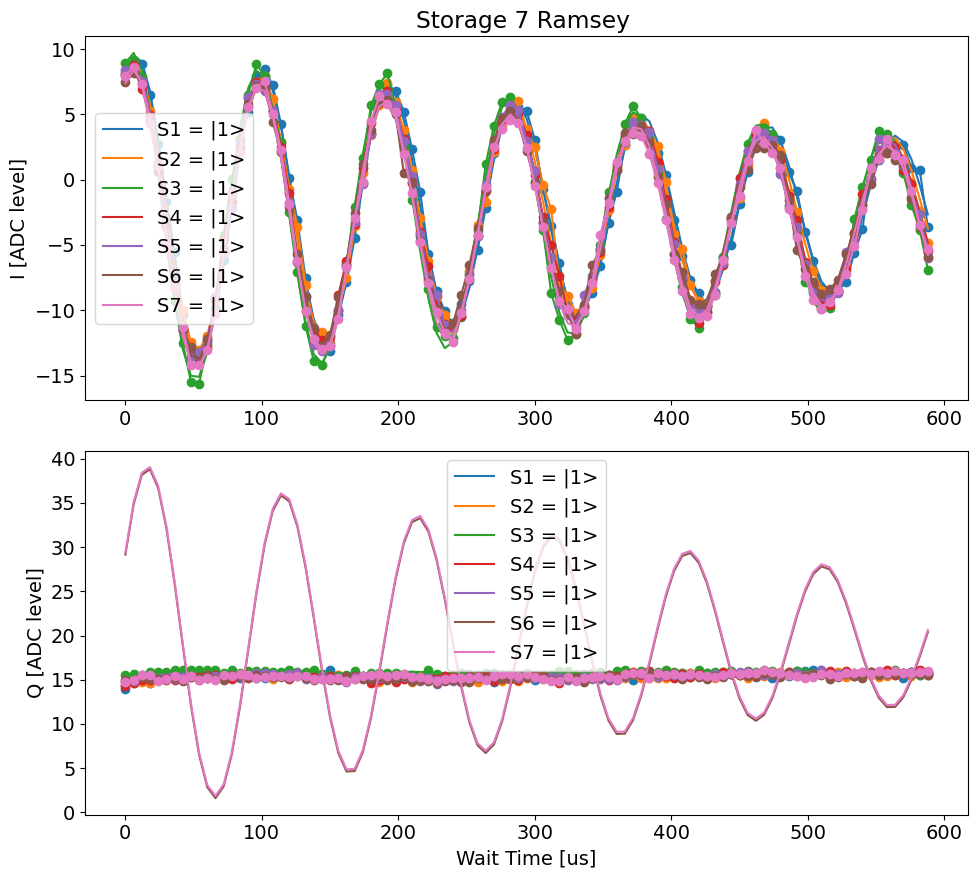

Processing mode 4 with original index 3
00080_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -3.631209835382039, which is out of bounds 13.857942973523421 to 16.021000276319423. Instead init to 14.939471624921422
Attempted to init fitparam 4 to 14.939471624921422, which is out of bounds 16.814634799937295 to 22.538279509042052. Instead init to 19.676457154489675
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.0064202913439895285 +/- 8.934235458467895e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.067895966976
 	4984.080736549664
T2 Ramsey from fit I [us]: 800.7499323215334
Fit frequency from Q [MHz]: 0.01431621735557247 +/- 0.00030992081443294517
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.060000040965
 	4984.088632475676
T2 Ramsey from fit Q [us]: 176.40000000000003
00081_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.676457154489675, which is out of bounds -13.251795727023229 to 6.785383937747762. Instead init to 

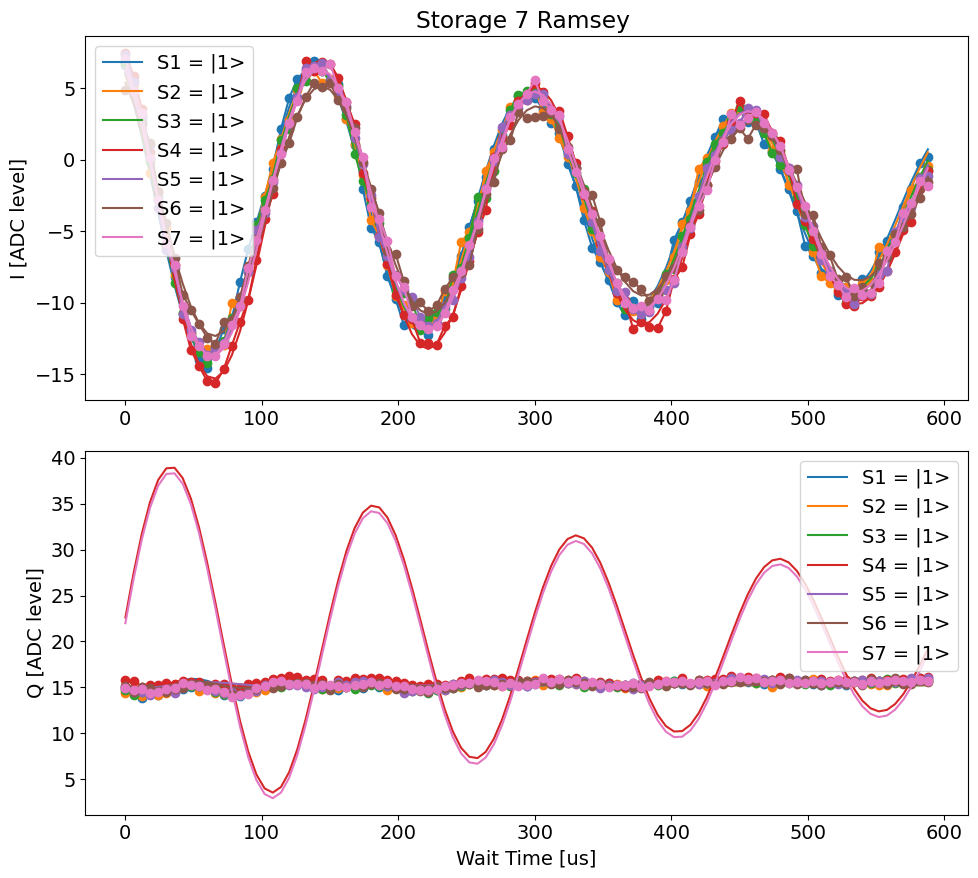

Processing mode 5 with original index 4
00087_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -3.6588847722815325, which is out of bounds 14.477544117452375 to 16.123310565324807. Instead init to 15.300427341388591
Attempted to init fitparam 4 to 15.300427341388591, which is out of bounds 17.03015078111553 to 22.602976248033215. Instead init to 19.816563514574373
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.009332719408154125 +/- 9.896357495710902e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.064983538912
 	4984.083648977728
T2 Ramsey from fit I [us]: 583.674741537646
Fit frequency from Q [MHz]: 0.009381547146790866 +/- 0.0004483569628558856
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.064934711173
 	4984.083697805467
T2 Ramsey from fit Q [us]: 191.14548272824794
00088_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.816563514574373, which is out of bounds -14.313384574609065 to 7.520595226903396. Instead init to -3

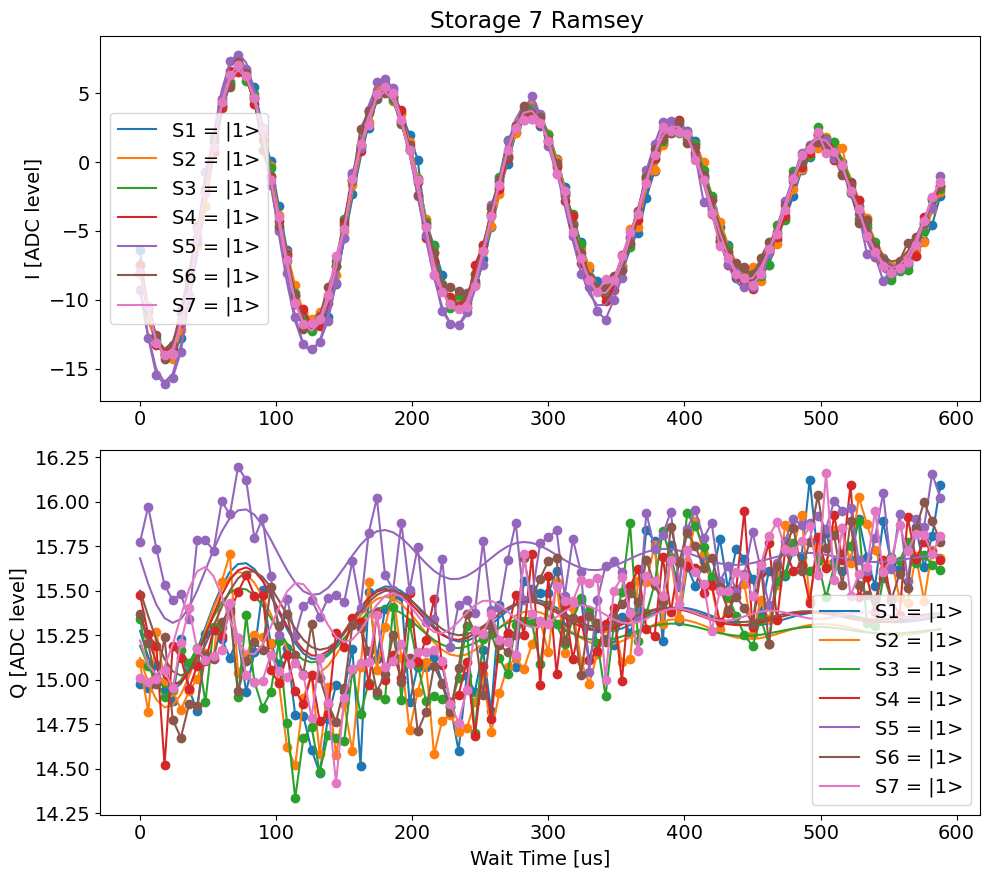

Processing mode 6 with original index 5
00094_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -2.752164671318537, which is out of bounds 14.196250757356236 to 16.22776687051457. Instead init to 15.212008813935403
Attempted to init fitparam 4 to 15.212008813935403, which is out of bounds 16.270792355246154 to 21.591682659197986. Instead init to 18.93123750722207
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.006613596986453638 +/- 1.3576030795174414e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.067702661334
 	4984.080929855307
T2 Ramsey from fit I [us]: 883.2547309934357
Fit frequency from Q [MHz]: 0.0008151128678440626 +/- 0.0002063219990003806
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.073501145453
 	4984.075131371188
T2 Ramsey from fit Q [us]: 205.80000000033183
00095_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 18.93123750722207, which is out of bounds -12.462751606845293 to 8.071868753061413. Instead init to -2

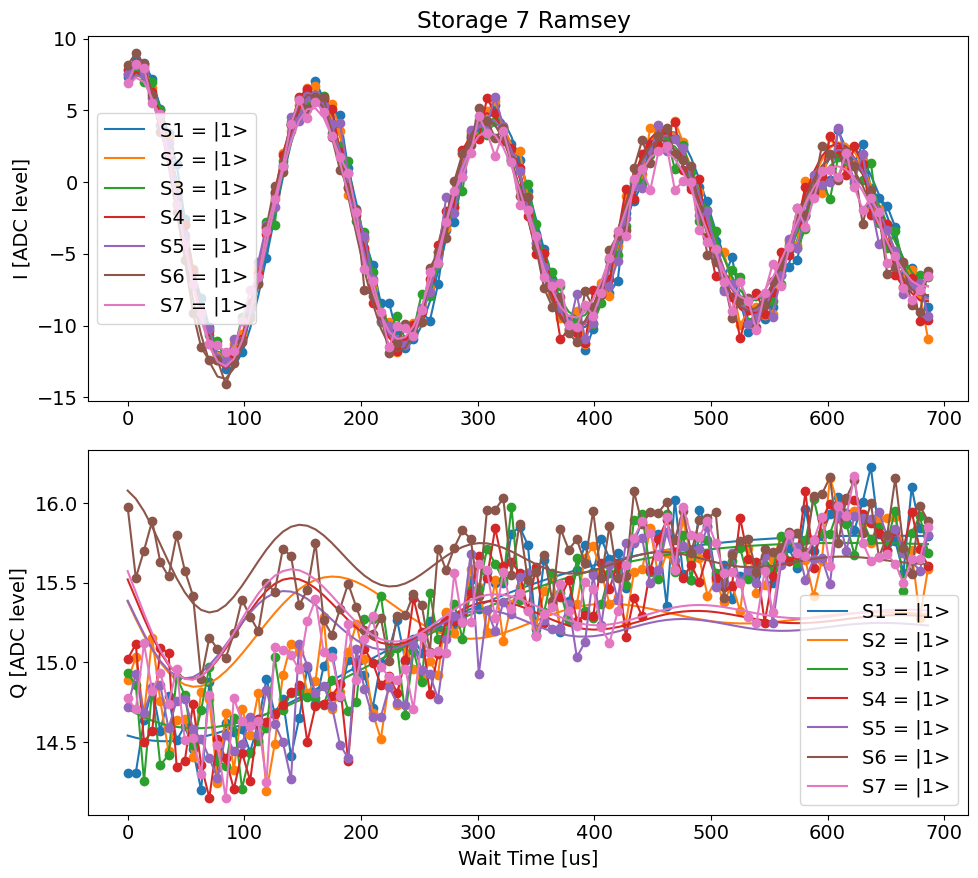

Processing mode 7 with original index 6
00101_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -3.8086211313044407, which is out of bounds 14.118019151234162 to 16.007039566310084. Instead init to 15.062529358772123
Attempted to init fitparam 4 to 15.062529358772123, which is out of bounds 17.020407257116517 to 22.249783334100453. Instead init to 19.635095295608487
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.007933129091488803 +/- 9.883441620761534e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.066383129229
 	4984.082249387412
T2 Ramsey from fit I [us]: 670.0434847341211
Fit frequency from Q [MHz]: 0.007997202037507962 +/- 0.00019888878807398079
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.066319056283
 	4984.082313460358
T2 Ramsey from fit Q [us]: 269.125425229273
00102_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.635095295608487, which is out of bounds -14.272923847091356 to 6.172653798800588. Instead init to -

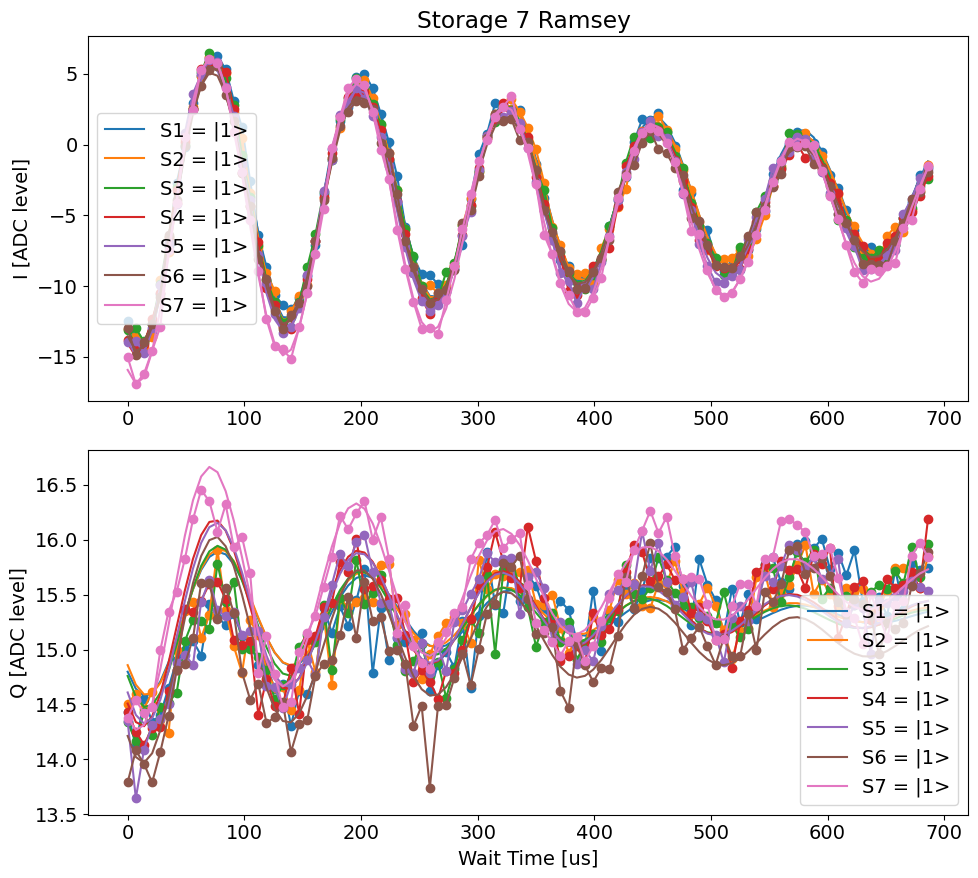

In [22]:
num_modes = 7
mode_list = [1, 2, 3, 4, 5, 6, 7]

cross_kerr_mat = np.zeros((num_modes, num_modes))
cross_kerr_err_mat = np.zeros((num_modes, num_modes))

for idx, mode_no in enumerate(mode_list):
    orig_idx = orig_idxs[idx]
    print(f'Processing mode {mode_no} with original index {orig_idx}')

    file_list = file_lists[idx]
    label_list =  [f'S1 = |1>',  f'S2 = |1>',  f'S3 = |1>', f'S4 = |1>', f'S5 = |1>', f'S6 = |1>', f'S7 = |1>']
    color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']#, 'tab:green']

    temp_data, attrs = prev_data(expt_path, '00066_CavityRamseyExperiment.h5') # just to get configs
    diffs, diffs_err = cross_kerr_display(expt_path, prev_data, file_list,  label_list, color_list, orig_idx = orig_idx, active_reset = True, threshold = -4.3, readouts_per_rep = 4,
                            ramsey_freq= attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, 
                            fitparams = [20, None, None, None, None, None],
                            normalize= [False, 'g_data', 'e_data'], title='Storage 7 Ramsey')
    
    cross_kerr_mat[idx] = diffs
    cross_kerr_err_mat[idx] = diffs_err

In [23]:
#columns for dataframe
columns = {'target': np.concatenate(([[m] * num_modes for m in mode_list])), 'source': mode_list * num_modes, 'cross_kerr': cross_kerr_mat.flatten(), 'cross_kerr_err': cross_kerr_err_mat.flatten()}
df = pd.DataFrame(columns)
df

target  source    cross_kerr  cross_kerr_err
0        1       1  0.000000e+00        0.000022
1        1       2  2.695166e-04        0.000024
2        1       3  1.264864e-04        0.000024
3        1       4  8.868452e-05        0.000025
4        1       5  4.269364e-05        0.000025
5        1       6  1.940413e-05        0.000025
6        1       7 -1.959562e-05        0.000027
7        2       1 -1.775436e-04        0.000011
8        2       2  0.000000e+00        0.000008
9        2       3 -6.922665e-05        0.000010
10       2       4 -7.109781e-05        0.000010
11       2       5  1.379138e-05        0.000010
12       2       6 -2.562237e-05        0.000010
13       2       7  9.109035e-07        0.000010
14       3       1 -7.563559e-05        0.000009
15       3       2 -4.421890e-05        0.000010
16       3       3  0.000000e+00        0.000007
17       3       4 -2.454493e-05        0.000008
18       3       5 -4.288644e-06        0.000008
19       3       6  2.245128e-06        0.000009
20       3       7 -3.335522e-06        0.000007
21       4       1  6.106480e-05        0.000009
22       4       2  4.564286e-05        0.000009
23       4       3  1.969732e-05        0.000009
24       4       4  0.000000e+00        0.000007
25       4       5  2.415480e-06        0.000009
26       4       6 -1.089046e-05        0.000010
27       4       7 -6.205920e-06        0.000008
28       5       1 -3.724887e-05        0.000010
29       5       2 -4.621929e-05        0.000009
30       5       3 -3.778094e-05        0.000009
31       5       4 -1.580346e-05        0.000009
32       5       5  0.000000e+00        0.000008
33       5       6 -2.526496e-05        0.000009
34       5       7 -2.204985e-06        0.000008
35       6       1 -4.315976e-05        0.000014
36       6       2 -1.658323e-05        0.000014
37       6       3 -4.069438e-05        0.000016
38       6       4  1.214483e-05        0.000014
39       6       5 -1.927669e-05        0.000015
40       6       6  0.000000e+00        0.000015
41       6       7  1.272979e-05        0.000017
42       7       1 -5.420853e-06        0.000010
43       7       2 -3.004079e-05        0.000009
44       7       3 -7.109338e-06        0.000010
45       7       4 -2.452322e-05        0.000009
46       7       5  8.538574e-06        0.000008
47       7       6 -1.070235e-05        0.000010
48       7       7  0.000000e+00        0.000007

In [24]:
cross_kerr_mat

array([[ 0.00000000e+00,  2.69516637e-04,  1.26486438e-04,
         8.86845176e-05,  4.26936404e-05,  1.94041328e-05,
        -1.95956248e-05],
       [-1.77543592e-04,  0.00000000e+00, -6.92266452e-05,
        -7.10978126e-05,  1.37913777e-05, -2.56223707e-05,
         9.10903529e-07],
       [-7.56355942e-05, -4.42189013e-05,  0.00000000e+00,
        -2.45449305e-05, -4.28864355e-06,  2.24512793e-06,
        -3.33552244e-06],
       [ 6.10648017e-05,  4.56428583e-05,  1.96973208e-05,
         0.00000000e+00,  2.41548015e-06, -1.08904643e-05,
        -6.20592017e-06],
       [-3.72488668e-05, -4.62192947e-05, -3.77809419e-05,
        -1.58034621e-05,  0.00000000e+00, -2.52649638e-05,
        -2.20498490e-06],
       [-4.31597553e-05, -1.65832342e-05, -4.06943788e-05,
         1.21448311e-05, -1.92766876e-05,  0.00000000e+00,
         1.27297852e-05],
       [-5.42085347e-06, -3.00407857e-05, -7.10933782e-06,
        -2.45232181e-05,  8.53857371e-06, -1.07023464e-05,
         0.0000000

In [25]:
cross_kerr_err_mat

array([[2.19646983e-05, 2.41393547e-05, 2.44440720e-05, 2.51601129e-05,
        2.52388042e-05, 2.52973987e-05, 2.72364845e-05],
       [1.05654254e-05, 8.29864967e-06, 1.01238095e-05, 9.83818715e-06,
        9.97873680e-06, 1.03723199e-05, 1.01565265e-05],
       [8.65079835e-06, 1.01269991e-05, 7.36090240e-06, 7.85033768e-06,
        8.32563830e-06, 8.77969967e-06, 7.48635345e-06],
       [8.93423546e-06, 9.02314693e-06, 9.12695981e-06, 6.75331489e-06,
        8.79065434e-06, 9.83080858e-06, 7.82242301e-06],
       [9.89635750e-06, 9.01466277e-06, 9.02747919e-06, 8.87843044e-06,
        8.18835136e-06, 9.29222097e-06, 7.83356758e-06],
       [1.35760308e-05, 1.37773242e-05, 1.63056708e-05, 1.37112870e-05,
        1.53958703e-05, 1.54189492e-05, 1.74830549e-05],
       [9.88344162e-06, 9.14306062e-06, 9.59114024e-06, 8.50964972e-06,
        8.00871615e-06, 9.61036059e-06, 7.22940608e-06]])

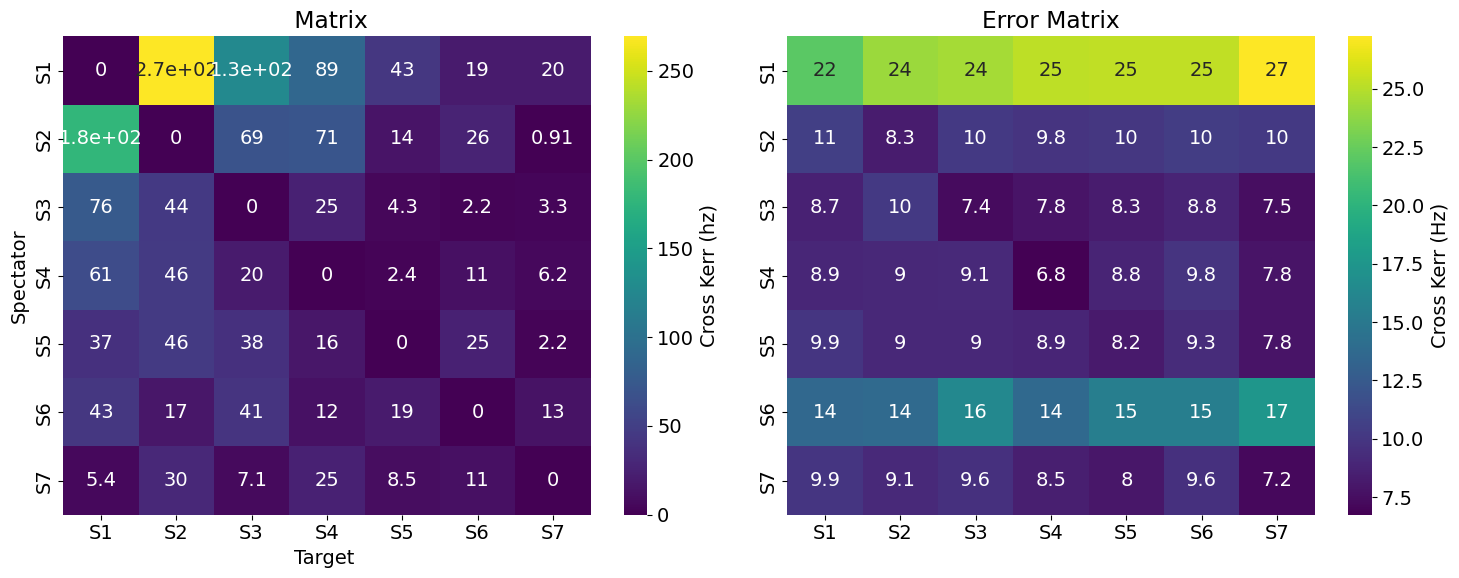

In [33]:
import seaborn as sns
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Plot t2s_mat
sns.heatmap(np.abs(np.round(cross_kerr_mat * 1e6, 3)), ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Cross Kerr (hz)'})
ax1.set_title(' Matrix')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Target ')
ax1.set_ylabel('Spectator')

# Plot t2_errs_mat
sns.heatmap(np.round(cross_kerr_err_mat * 1e6, 2), ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Cross Kerr (Hz)'})
ax2.set_title('Error Matrix')
ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])

# Display the plots
plt.tight_layout()
plt.show()

[[ 66,  67,  68,  69,  70,  71,  72],
       [108, 109, 110, 111, 112, 113, 114],
       [ 73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86],
       [ 87,  88,  89,  90,  91,  92,  93],
       [ 94,  95,  96,  97,  98,  99, 100],
       [101, 102, 103, 104, 105, 106, 107]]

# Kerr Analysis

In [10]:
temp_data, attrs = prev_data(expt_path_new, '00003_ParityGainExperiment.h5')   # 32
# temp_data['confusion_matrix'] = [0.9866, 0.013399999999999967, 0.0327, 0.9673]


In [33]:
# ge fidelity (%): 96.945
# rotation angle (deg): 3.3289840743972405
# threshold ge: -59.29477736470881
# Confusion matrix [Pgg, Pge, Peg, Pee]:  [0.9918, 0.008199999999999985, 0.022349999999999988, 0.97765]

In [11]:
def bin_ss_data(temp_data, attrs, conf = True):
    '''
    Bin the single shot data into P(e)
    '''
    rounds = attrs['config']['expt']['rounds']
    reps = attrs['config']['expt']['reps']
    expts = attrs['config']['expt']['expts']

    I_data = temp_data['I_data']
    Q_data = temp_data['Q_data']

    # reshape data into (rounds * reps x expts)
    I_data = np.reshape(np.transpose(np.reshape(I_data, (rounds, expts, reps)), (0, 2, 1)), (rounds*reps, expts))
    Q_data = np.reshape(np.transpose(np.reshape(Q_data, (rounds, expts, reps)), (0, 2, 1)), (rounds*reps, expts))


    # rotate I,Q based on the angle calibration
    # theta = (-1*(float(temp_data['angle'])) - attrs['config']['device']['readout']['phase']) * np.pi/180 # to radians
    theta = 0
    I_data_rot = I_data*np.cos(theta) - Q_data*np.sin(theta)
    Q_data_rot = I_data*np.sin(theta) + Q_data*np.cos(theta)

    # threshold data
    shots = np.zeros((rounds*reps, expts))
    print(shots.shape)
    shots[I_data_rot > temp_data['thresholds']] = 1

    # average over rounds and reps
    shots_avg = np.mean(shots, axis=0)
    np.shape(shots_avg)

    # fix using confusion matrix 
    ydata = shots_avg
    if conf: 
        P_matrix = np.matrix([[temp_data['confusion_matrix'][0], temp_data['confusion_matrix'][2]],[temp_data['confusion_matrix'][1], temp_data['confusion_matrix'][3]]])
        for i in range(len(ydata)):
            #ydata_old.append(ydata[i])
            counts_new = inv(P_matrix)*np.matrix([[1-ydata[i]],[ydata[i]]])
            ydata[i] = counts_new[1,0]


    return ydata

Fit the data to the theoretical model

In [12]:
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline

def coherent_odd(alpha):
    return np.sinh(np.abs(alpha)**2)/np.exp(np.abs(alpha)**2)


# Step 1: Define the function
alpha_list = np.linspace(0, 3, 100)
ws = coherent_odd(alpha_list)

# Step 2: Choose data points
x = alpha_list  # 10 points from 0 to 10
y = ws

# Step 3: Create the cubic spline
# cs = CubicSpline(x, y)

# Assuming wigner_tomography_analysis and other necessary imports are defined
ydata = bin_ss_data(temp_data, attrs)
ydata_old = []
xdata = temp_data['xpts']   
#rescale data to be between 0 and 1
#ydata = (ydata - min(ydata))/(max(ydata) - min(ydata))
# invert data
# ydata = 1 - ydata
# rescale data to have max value of max(ws)
# ydata = ydata * max(ws)
# conf = True

# if conf:
#     P_matrix = np.matrix([[temp_data['confusion_matrix'][0], temp_data['confusion_matrix'][2]],[temp_data['confusion_matrix'][1], temp_data['confusion_matrix'][3]]])
#     for i in range(len(ydata)):
#         ydata_old.append(ydata[i])
#         counts_new = inv(P_matrix)*np.matrix([[1-ydata[i]],[ydata[i]]])
#         ydata[i] = counts_new[1,0]



# Objective function to fit data to wigner function curve 
def objective(param):
    gain_to_alpha = param[0]
    new_alpha_list = gain_to_alpha * xdata
    ws = coherent_odd(new_alpha_list)
    # print('gain_to_alpha:', gain_to_alpha)
    # print('objective:', np.sum(np.abs(ws - ydata)))
    # print('-----------------------------------')
    return np.sum(np.abs(ws - ydata))  # sum of absolute differences

# Initial guess for start and end of alpha_list
initial_guess = [0.0002]

# Bounds for start and end values of alpha_list
bounds = [(0, 0.001)]

# Run the optimizer
result = minimize(objective, initial_guess, bounds=bounds)

(1000, 100)


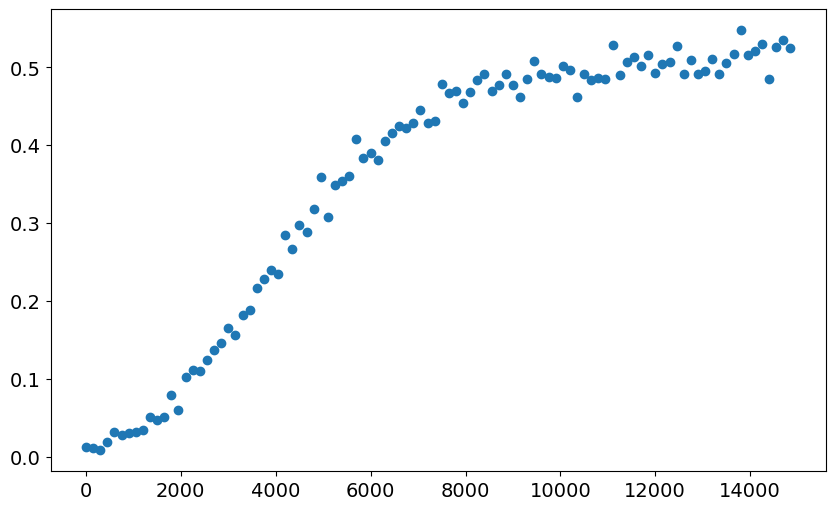

In [36]:
plt.plot(xdata, ydata, 'o', label='data')

Conversion factor: 0.00014616
alpha = 1 requires gain of : 6841.69921218


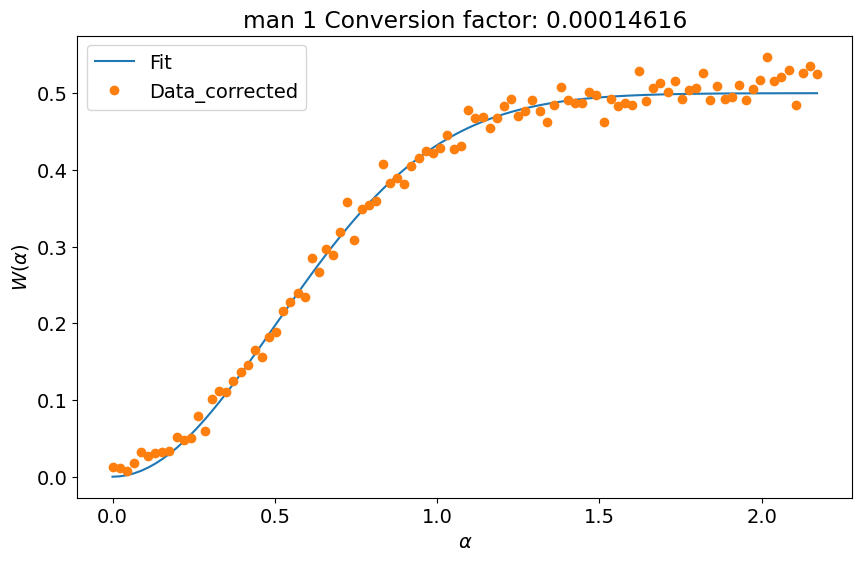

In [37]:
# plot the result 
gain_to_alpha = result.x[0]
new_alpha_list = gain_to_alpha * xdata
plt.plot(new_alpha_list, coherent_odd(new_alpha_list), '-', label='Fit')
plt.plot(new_alpha_list, ydata, 'o', label='Data_corrected')
#plt.plot(new_alpha_list, ydata_old, 'o', label='Data')

#label axes
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$W(\alpha)$')
plt.legend()
plt.title('man 1 Conversion factor: {:.8f}'.format(gain_to_alpha))
#gain_to_alpha = 0.00030837
print('Conversion factor: {:.8f}'.format(gain_to_alpha))
print('alpha = 1 requires gain of : {:.8f}'.format(1/gain_to_alpha))

## Kerr Analysis Functions

In [278]:
def small_angle_approx_P0(t, args): 
        return np.exp(-2* np.abs(args['alpha'])**2 * (1 - np.cos(args['omega'] * (t + args['t0']))) )

def rescale_ydata(ydata, alpha):
    '''rescale y data so can fit it to model'''

    args = {'alpha': alpha, 'omega': 1, 't0': 0}
    min_value_model = small_angle_approx_P0(np.pi, args)
    # print('min_value_model:', min_value_model)

    ydata_scaled = (ydata - min(ydata))/(max(ydata) - min(ydata))
    ydata_final = ydata_scaled * (1 - min_value_model) + min_value_model
    return ydata_final

def fit_to_model(ydata, tlist, args, center_freq=0.24, init_f0 = 0.23, init_t0 = 10, freq_bounds=(0 * 2 * np.pi, 0.4 * 2 * np.pi),
                 outlier_threshold = 0.1):
    '''
    fit data to model

    center freq: frequency of oscillations for most alpha points (this is to ensure we don't have outliers)
    '''
    center_freq = center_freq * 2 * np.pi    #what the frequency of most alpha points (has to adjusted by eye) do for single cases below first!!!
    init_f0 = init_f0 *2*np.pi   # initial guess for frequency (ramsey freq)
    init_t0 = init_t0
    freq = 0

    while np.abs(freq - center_freq)/center_freq >outlier_threshold:
        # the 10% threshold should be large enough so that can tolerate deviations from ceneter due to kerr
        
        init_f0 -= 0.01
        if init_f0 <= 0.0: 
            # this helps to break the loop if no initial guess makes opt return a  frequency that is within __% of the center frequency   
            break
        def objective(param):

            args['omega'] = param[0]
            args['t0'] = param[1]
            ws = small_angle_approx_P0(tlist, args)

            return np.sum(np.abs(ws - ydata))  # sum of absolute differences

        # Initial guess for start and end of alpha_list
        initial_guess = [init_f0 * 2 * np.pi, init_t0]

        # Bounds for start and end values of alpha_list
        bounds = [freq_bounds, (-10, 40)]

        # Run the optimizer
        result = minimize(objective, initial_guess, bounds=bounds, tol=1e-5, options={'disp': True}) #, method = 'BFGS')

        freq = result.x[0]
        # print(f'Initial Frequency: {init_f0/2/np.pi}')
        # print(f'Frequency: {freq/2/np.pi}')

    return result.x

def plot_kerr(freqs, alpha_list_, mode_label = 'Stor 6', center_freq=0.23, idx_skip = None, idx_end = None):
    '''
    Plot the kerr frequency vs alpha^2
    '''
   

    from scipy import stats

    # make figure with 2 subplots 
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot([alpha **2 for alpha in alpha_list_[idx_skip:idx_end]], np.array(freqs[idx_skip: idx_end])/(2*np.pi), 'o', label='Data')

    x = [alpha **2 for alpha in alpha_list_[idx_skip:idx_end]]
    y = np.array(freqs[idx_skip: idx_end])/(2*np.pi)    # convert to MHz

    # skip over outliers 
    center = center_freq 
    new_x, new_y = [], []
    for idx, freq in enumerate(y):
        if np.abs(freq - center)/ center < 0.04:
            new_x.append(x[idx])
            new_y.append(y[idx])
    slope, intercept, r_value, p_value, std_err = stats.linregress(new_x, new_y)

    print(f"Slope: {slope}")
    ax[1].plot(new_x, [slope * x_ + intercept for x_ in new_x], label='Fit')
    ax[1].plot(new_x, new_y, 'o', label='Data without outliers')

    # put slope in title (round to 5 decimal places)
    plt.suptitle(mode_label + f'Slope: {slope * 1e+3:.5f} +/- {std_err * 1e+3:.5f}kHz')
    ax[0].set_title('Original Data')
    ax[1].set_title('Data without Outliers')
    # print the title 
    print(f'Stor 5 Slope: {slope * 1e+3:.5f} +/- {std_err * 1e+3:.5f}kHz')
    plt.xlabel(r'$\alpha^2$ (photon number)')
    ax[0].set_ylabel('Ramsey Frequency (MHz)')

    return slope * 1e+3, std_err * 1e+3
def compute_freqs_for_alpha(alpha_list, xlist, zlist, center_freq=0.23, init_f0 = 0.23, init_t0 = 10):
    '''
    Compute the frequencies for the given alpha list
    xlist = time
    zlist = ydata
    '''

    freqs = []
    t0s = []
    alpha_list_ = []

    for idx, alpha in enumerate(alpha_list):
        ydata = zlist[idx]
        tlist = xlist
        omega = 0.5 * 2 *np.pi # MHz 
        alpha = alpha_list[idx]
        print(f'Alpha: {alpha_list[idx]}')

        args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

        y_data_final = rescale_ydata(ydata, alpha)

        result = fit_to_model(y_data_final, tlist, args, center_freq=center_freq, init_f0 = init_f0, init_t0 = init_t0)
        print('center_freq:', center_freq)
        freq, t0 = result
        print(f'Frequency: {freq}, t0: {t0}')

        # store all params
        freqs.append(freq)
        t0s.append(t0)
        alpha_list_.append(alpha_list[idx])
    return freqs, t0s, alpha_list_
def plot_raw_Kerr_data(file_list, expt_path = expt_path_new):
    '''Plot sweep data for kerr
    should produce a 3d plot with 1dim as colorbar
    ''' 
    
    y_list = []
    gain_list = []
    name = '_cavity_ramsey_sweep.h5'
    data_list = []
    attrs_list = []
    for file_no in file_list:
        full_name = str(file_no).zfill(5)+name
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        data_list.append(temp_data)
        attrs_list.append(attrs)
        gain_list.append(attrs['config']['expt']['user_defined_pulse'][2])

    gain_to_alpha = attrs['config']['device']['manipulate']['gain_to_alpha'][0] * 3
    alpha_list = np.array(gain_list)*gain_to_alpha
    print('Gain to alpha:', gain_to_alpha)  

    threshold = attrs['config']['device']['readout']['threshold'][0]
    xlist, ylist, zlist = plot_ramsey_sideband(data_list, attrs_list, y_list = alpha_list, active_reset=True, threshold=threshold, readouts_per_rep=4)
    return xlist, ylist, zlist

In [204]:
1*0.017*2*np.pi/360

0.000296705972839036

## Create a dataframe that stores kerr, kerr_err, file_list, mode_name 


In [175]:
columns= ['file_list', 'file_name' , 'stor_no','expt_path', 'kerr', 'kerr_err']
kerr_df = pd.DataFrame(columns=columns)

# save df 
# Save the dataframe '
folder = os.path.join(data_parent, 'RAM_paper_results', 'datasets')
file_name = 'Storage_Kerr.csv'
kerr_file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
kerr_df.to_csv(kerr_file_path, index=False)

print(f"DataFrame saved to {kerr_file_path}")
kerr_df


DataFrame saved to H:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\Storage_Kerr.csv


Empty DataFrame
Columns: [file_list, file_name, stor_no, expt_path, kerr, kerr_err]
Index: []

## Storage 1

In [267]:
temp_data, attrs = prev_data(expt_path, '00625_cavity_ramsey_sweep.h5')   # 32
attrs['config']['expt']

{'start': 0,
 'step': 0.025,
 'expts': 151,
 'ramsey_freq': 1.5,
 'reps': 500,
 'rounds': 1,
 'qubits': [0],
 'checkEF': False,
 'f0g1_cavity': 0,
 'init_gf': False,
 'active_reset': True,
 'man_reset': True,
 'storage_reset': True,
 'user_defined_pulse': [True, 4984.026194477733, 300, 0.15, 0, 4],
 'parity_meas': False,
 'man_idx': 1,
 'storage_ramsey': [True, 1, False],
 'prepulse': False,
 'postpulse': True,
 'pre_sweep_pulse': [[3568.1782381859975, 3425.559887601728, 0],
  [13639, 10338, 0],
  [0, 0, 0.01],
  [0, 0, 0],
  [2, 2, 5],
  ['gaussian', 'gaussian', 'flat_top'],
  [0.025, 0.025, 0.005]],
 'post_sweep_pulse': [[3568.1782381859975],
  [50],
  [6.504911065860095],
  [0],
  [2],
  ['flat_top'],
  [0.005]]}

Gain to alpha: 0.00093297


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


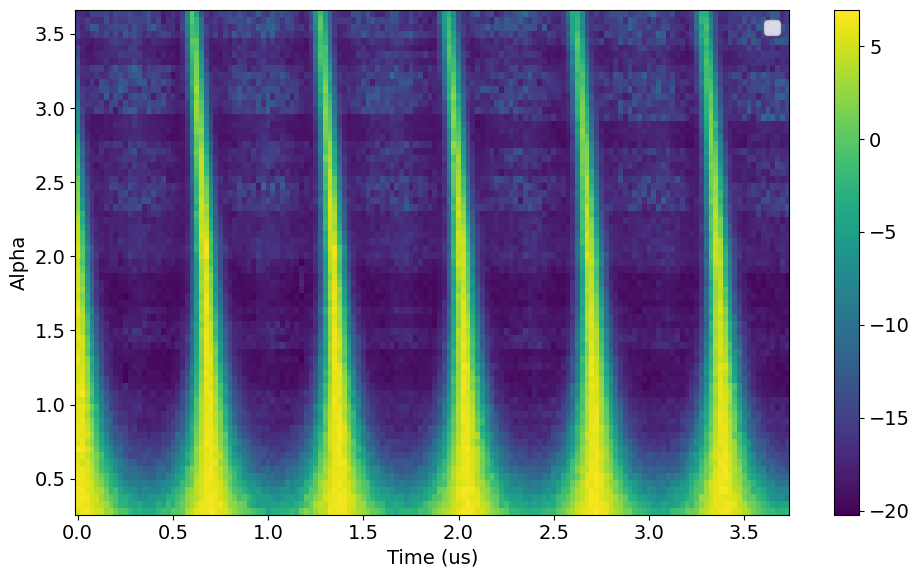

In [268]:
# file_list = np.arange(854, 886, 1)
file_list = np.arange(625,698,1)
# file_list = np.arange(148, 162, 1)
expt_path_here = expt_path

xlist, ylist, zlist = plot_raw_Kerr_data(file_list, expt_path = expt_path_here)
alpha_list = ylist

In [295]:
import numpy as np
from scipy.optimize import minimize

freqs = []
t0s = []
alpha_list_ = []

for idx, alpha in enumerate(alpha_list):
    ydata = zlist[idx]
    tlist = xlist
    omega = 0.5 * 2 *np.pi # MHz 
    alpha = alpha_list[idx]
    print(f'Alpha: {alpha_list[idx]}')

    args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

    y_data_final = rescale_ydata(ydata, alpha)

    result = fit_to_model(y_data_final, tlist, args, center_freq=1.48, init_f0 = 1.6, init_t0 = 20, freq_bounds = (0*2*np.pi, 2*2*np.pi), 
                    outlier_threshold = 0.1)

    freq, t0 = result
    print(f'Frequency: {freq}, t0: {t0}')

    # store all params
    freqs.append(freq)
    t0s.append(t0)
    alpha_list_.append(alpha_list[idx])



Alpha: 0.279891
Frequency: 9.339900369175862, t0: 14.09921452388023
Alpha: 0.3265395
Frequency: 9.310052040449271, t0: 16.84801395147657
Alpha: 0.37318799999999996
Frequency: 9.309385216366113, t0: 29.000269214325996
Alpha: 0.4198365
Frequency: 9.347015240975797, t0: 15.43310068581701
Alpha: 0.466485
Frequency: 9.320114300086148, t0: 26.27097402028241
Alpha: 0.5131335
Frequency: 9.325222006563216, t0: 16.14777066540495
Alpha: 0.559782
Frequency: 9.33225769931939, t0: 19.5024238975976
Alpha: 0.6064305
Frequency: 9.33885710883465, t0: 16.796121605149708
Alpha: 0.653079
Frequency: 9.333161937323446, t0: 18.826982883939337
Alpha: 0.6997275
Frequency: 9.31976813370957, t0: 13.461855306844344
Alpha: 0.7463759999999999
Frequency: 9.309019995753436, t0: 6.731559636382154
Alpha: 0.7930245
Frequency: 9.329364642348091, t0: 14.795563779771753
Alpha: 0.839673
Frequency: 9.321742279855265, t0: 20.202271734657323
Alpha: 0.8863215
Frequency: 9.320884377368914, t0: 9.418857431607968
Alpha: 0.93297
Fre

In [ ]:
freqs[-2]/2/np.pi

0.26523288864343303

Slope: 0.0008406120434676791
Stor 5 Slope: 0.84061 +/- 0.07463kHz


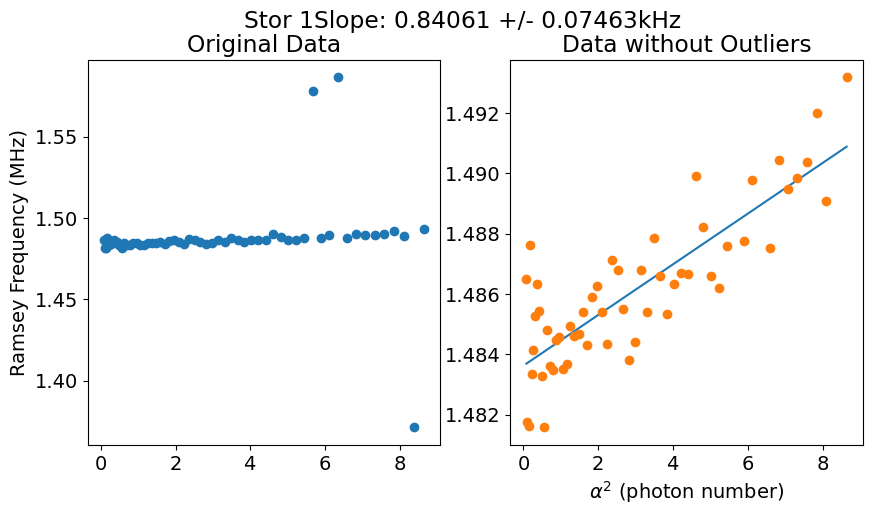

In [300]:
kerr, kerr_err = plot_kerr(freqs, alpha_list_, mode_label = 'Stor 1', center_freq= 1.49, idx_skip = None, idx_end = -15)
# this looks weird. Need to revisit the data later


In [ ]:
0.01/0.28

0.03571428571428571

In [301]:
# add a row to the dataframe and save 
file_name='_cavity_ramsey_sweep.h5'
row = [file_list, file_name, 1, expt_path_here, kerr, kerr_err]
kerr_df.loc[len(kerr_df)] = row
kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list                file_name  \
0  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   
1  [1042, 1043, 1044, 1045, 1046, 1047, 1048, 104...  _cavity_ramsey_sweep.h5   
2  [166, 167, 168, 169, 170, 171, 172, 173, 174, ...  _cavity_ramsey_sweep.h5   
3  [333, 334, 335, 336, 337, 338, 339, 340, 341, ...  _cavity_ramsey_sweep.h5   
4  [854, 855, 856, 857, 858, 859, 860, 861, 862, ...  _cavity_ramsey_sweep.h5   
5  [625, 626, 627, 628, 629, 630, 631, 632, 633, ...  _cavity_ramsey_sweep.h5   

   stor_no                                          expt_path      kerr  \
0        4  H:\Shared drives\SLab\Multimode\experiment\240...  0.297145   
1        5  H:\Shared drives\SLab\Multimode\experiment\240...  0.466322   
2        6  H:\Shared drives\SLab\Multimode\experiment\240...  0.193639   
3        7  H:\Shared drives\SLab\Multimode\experiment\240... -0.047567   
4        2  H:\Shared drives\SLab\Multimode\experiment\240...  0.062168   
5        1  H:\Shared drives\SLab\Multimode\experiment\240...  0.840612   

   kerr_err  
0  0.095125  
1  0.034272  
2  0.030144  
3  0.039759  
4  0.018040  
5  0.074634

Alpha: 1.212861
Frequency: 1.4846743862708534, t0: 10.76317628507126


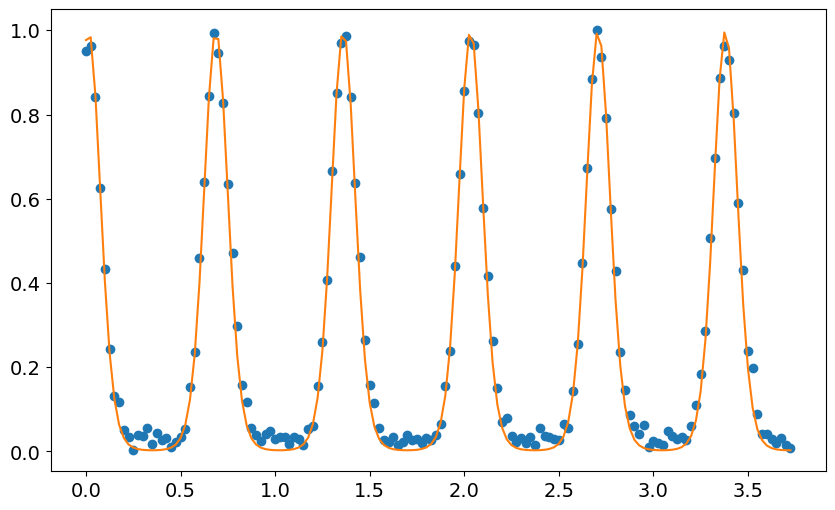

In [293]:
idx = 20

ydata = zlist[idx]
tlist = xlist
omega = 0.5 * 2 *np.pi # MHz 
alpha = alpha_list[idx]
print(f'Alpha: {alpha_list[idx]}')

args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

y_data_final = rescale_ydata(ydata, alpha)
result = fit_to_model(y_data_final, tlist, args, center_freq=1.48, init_f0 = 1.6, init_t0 = 20, freq_bounds = (0*2*np.pi, 2*2*np.pi), 
                      outlier_threshold = 0.1)
freq, t0 = result
print(f'Frequency: {freq/(2*np.pi)}, t0: {t0}')

plt.plot(tlist, y_data_final, 'o', label='Data')
plt.plot(tlist, small_angle_approx_P0(tlist, args), label='Model')
# print('freq:', result.x[0]/(2*np.pi))

## Storage 2

In [246]:
temp_data, attrs = prev_data(expt_path, '00854_cavity_ramsey_sweep.h5')   # 32
attrs['config']['expt']

{'start': 0,
 'step': 0.125,
 'expts': 151,
 'ramsey_freq': 0,
 'reps': 500,
 'rounds': 1,
 'qubits': [0],
 'checkEF': False,
 'f0g1_cavity': 0,
 'init_gf': False,
 'active_reset': True,
 'man_reset': True,
 'storage_reset': True,
 'user_defined_pulse': [True, 4984.026194477733, 1400, 0.15, 0, 4],
 'parity_meas': False,
 'man_idx': 1,
 'storage_ramsey': [True, 2, False],
 'prepulse': False,
 'postpulse': True,
 'pre_sweep_pulse': [[3568.1782381859975, 3425.559887601728, 0],
  [13639, 10338, 0],
  [0, 0, 0.01],
  [0, 0, 0],
  [2, 2, 5],
  ['gaussian', 'gaussian', 'flat_top'],
  [0.025, 0.025, 0.005]],
 'post_sweep_pulse': [[3568.1782381859975],
  [50],
  [6.504911065860095],
  [0],
  [2],
  ['flat_top'],
  [0.005]]}

Gain to alpha: 0.00042195000000000004


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


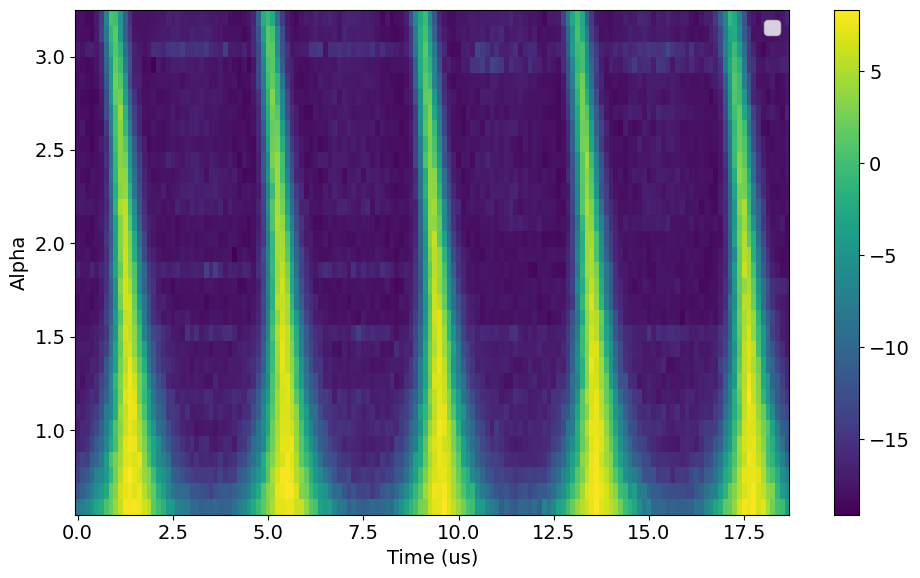

In [249]:
file_list = np.arange(854, 886, 1)
# file_list = np.arange(148, 162, 1)
expt_path_here = expt_path

xlist, ylist, zlist = plot_raw_Kerr_data(file_list, expt_path = expt_path_here)
alpha_list = ylist

In [262]:
import numpy as np
from scipy.optimize import minimize

freqs, t0s, alpha_list_ = compute_freqs_for_alpha(ylist, xlist, zlist, center_freq=0.25, init_f0 = 0.30, init_t0 = 10)


Alpha: 0.5907300000000001
center_freq: 0.25
Frequency: 1.5466461034191643, t0: 6.682152938938469
Alpha: 0.67512
center_freq: 0.25
Frequency: 1.5432624672933162, t0: 6.724517046229948
Alpha: 0.75951
center_freq: 0.25
Frequency: 1.544264959054122, t0: 6.710143324937825
Alpha: 0.8439000000000001
center_freq: 0.25
Frequency: 1.5434605305007898, t0: 10.799292776977744
Alpha: 0.9282900000000001
center_freq: 0.25
Frequency: 1.5431142776247138, t0: 23.019010874334178
Alpha: 1.01268
center_freq: 0.25
Frequency: 1.5428877325531725, t0: 14.883932751660087
Alpha: 1.09707
center_freq: 0.25
Frequency: 1.5432711115476048, t0: 10.811726863281933
Alpha: 1.1814600000000002
center_freq: 0.25
Frequency: 1.5445693317875568, t0: 18.949418432290233
Alpha: 1.2658500000000001
center_freq: 0.25
Frequency: 1.5427497002389863, t0: 10.843309538601204
Alpha: 1.35024
center_freq: 0.25
Frequency: 1.5440009519707136, t0: 14.913789857211555
Alpha: 1.43463
center_freq: 0.25
Frequency: 1.5432586381604236, t0: 2.726818592

In [ ]:
freqs[-2]/2/np.pi

0.26523288864343303

Slope: 6.216758534273494e-05
Stor 5 Slope: 0.06217 +/- 0.01804kHz


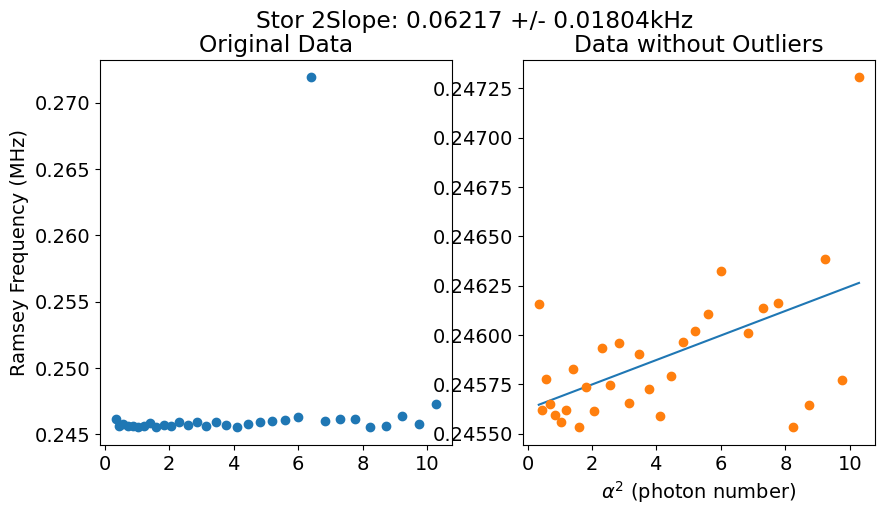

In [263]:
kerr, kerr_err = plot_kerr(freqs, alpha_list_, mode_label = 'Stor 2', center_freq= 0.245, idx_skip = None, idx_end = None)
# this looks weird. Need to revisit the data later


In [ ]:
0.01/0.28

0.03571428571428571

In [265]:
# add a row to the dataframe and save 
file_name='_cavity_ramsey_sweep.h5'
row = [file_list, file_name, 2, expt_path_here, kerr, kerr_err]
kerr_df.loc[len(kerr_df)] = row
kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list                file_name  \
0  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   
1  [1042, 1043, 1044, 1045, 1046, 1047, 1048, 104...  _cavity_ramsey_sweep.h5   
2  [166, 167, 168, 169, 170, 171, 172, 173, 174, ...  _cavity_ramsey_sweep.h5   
3  [333, 334, 335, 336, 337, 338, 339, 340, 341, ...  _cavity_ramsey_sweep.h5   
4  [854, 855, 856, 857, 858, 859, 860, 861, 862, ...  _cavity_ramsey_sweep.h5   

   stor_no                                          expt_path      kerr  \
0        4  H:\Shared drives\SLab\Multimode\experiment\240...  0.297145   
1        5  H:\Shared drives\SLab\Multimode\experiment\240...  0.466322   
2        6  H:\Shared drives\SLab\Multimode\experiment\240...  0.193639   
3        7  H:\Shared drives\SLab\Multimode\experiment\240... -0.047567   
4        2  H:\Shared drives\SLab\Multimode\experiment\240...  0.062168   

   kerr_err  
0  0.095125  
1  0.034272  
2  0.030144  
3  0.039759  
4  0.018040

Alpha: 3.2068200000000004
Frequency: 0.2473064893529322, t0: 7.0929632024221005


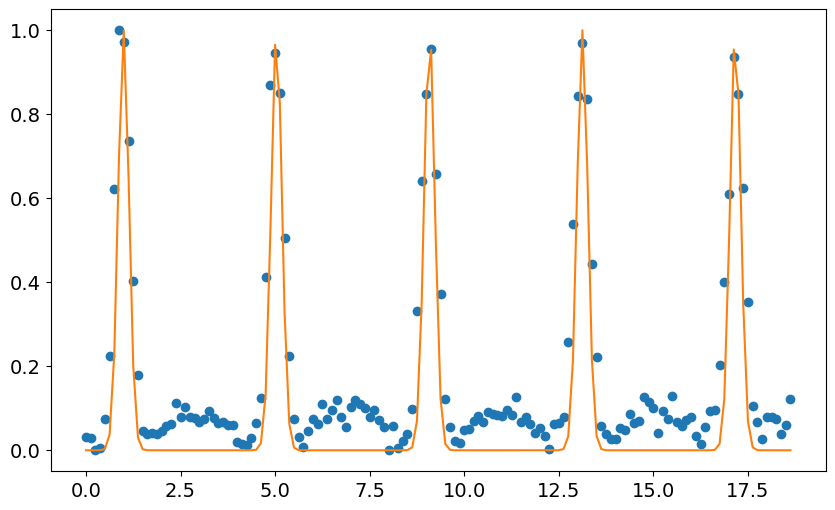

In [264]:
idx = -1

ydata = zlist[idx]
tlist = xlist
omega = 0.5 * 2 *np.pi # MHz 
alpha = alpha_list[idx]
print(f'Alpha: {alpha_list[idx]}')

args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

y_data_final = rescale_ydata(ydata, alpha)
result = fit_to_model(y_data_final, tlist, args, center_freq=0.25, init_f0 = 0.30, init_t0 = 10)
freq, t0 = result
print(f'Frequency: {freq/(2*np.pi)}, t0: {t0}')

plt.plot(tlist, y_data_final, 'o', label='Data')
plt.plot(tlist, small_angle_approx_P0(tlist, args), label='Model')
# print('freq:', result.x[0]/(2*np.pi))

## Storage 3

In [323]:
temp_data, attrs = prev_data(expt_path, '01000_cavity_ramsey_sweep.h5')   # 32
attrs['config']['expt']

{'start': 0,
 'step': 0.125,
 'expts': 151,
 'ramsey_freq': 0.5,
 'reps': 500,
 'rounds': 1,
 'qubits': [0],
 'checkEF': False,
 'f0g1_cavity': 0,
 'init_gf': False,
 'active_reset': True,
 'man_reset': True,
 'storage_reset': True,
 'user_defined_pulse': [True, 4984.026194477733, 7800, 0.15, 0, 4],
 'parity_meas': False,
 'man_idx': 1,
 'storage_ramsey': [True, 4, False],
 'prepulse': False,
 'postpulse': True,
 'pre_sweep_pulse': [[3568.1782381859975, 3425.559887601728, 0],
  [13639, 10338, 0],
  [0, 0, 0.01],
  [0, 0, 0],
  [2, 2, 5],
  ['gaussian', 'gaussian', 'flat_top'],
  [0.025, 0.025, 0.005]],
 'post_sweep_pulse': [[3568.1782381859975],
  [50],
  [6.504911065860095],
  [0],
  [2],
  ['flat_top'],
  [0.005]]}

Gain to alpha: 0.00042195000000000004


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


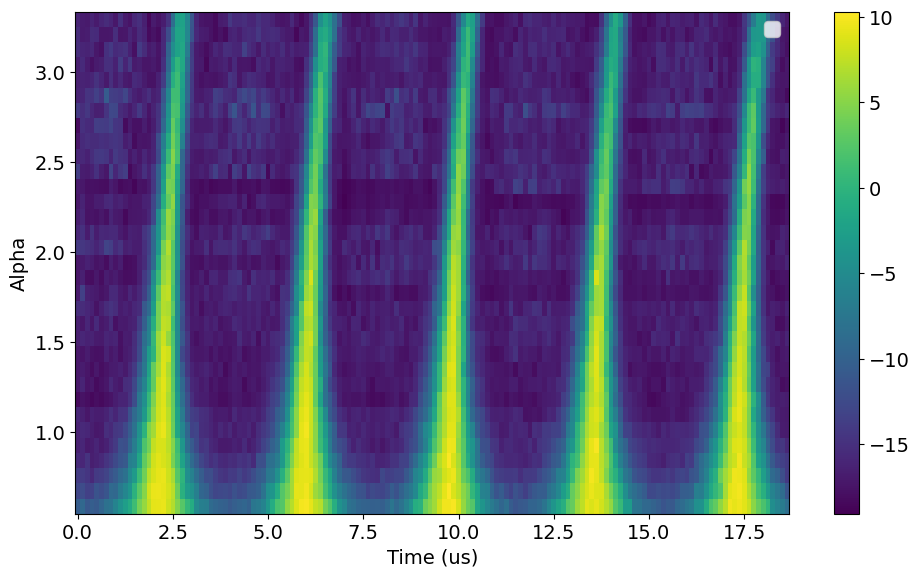

In [304]:
file_list = np.arange(1001, 1034, 1)
# file_list = np.arange(148, 162, 1)
expt_path_here = expt_path

xlist, ylist, zlist = plot_raw_Kerr_data(file_list, expt_path = expt_path_here)
alpha_list = ylist

In [320]:
import numpy as np
from scipy.optimize import minimize

freqs, t0s, alpha_list_ = compute_freqs_for_alpha(ylist, xlist, zlist, center_freq=0.26, init_f0 = 0.30, init_t0 = 4)


Alpha: 0.5907300000000001
center_freq: 0.26
Frequency: 1.6574551294088766, t0: 1.6416119796041857
Alpha: 0.67512
center_freq: 0.26
Frequency: 1.6536649836754822, t0: 1.6662826659534877
Alpha: 0.75951
center_freq: 0.26
Frequency: 1.6579118975156697, t0: 5.426322851298472
Alpha: 0.8439000000000001
center_freq: 0.26
Frequency: 1.6574446660945579, t0: 1.6243060673439111
Alpha: 0.9282900000000001
center_freq: 0.26
Frequency: 1.6558116691578444, t0: 1.6274042331643364
Alpha: 1.01268
center_freq: 0.26
Frequency: 1.6576043727171474, t0: 5.4000900110540115
Alpha: 1.09707
center_freq: 0.26
Frequency: 1.658108648851429, t0: 5.381389578033663
Alpha: 1.1814600000000002
center_freq: 0.26
Frequency: 1.6549704918815145, t0: 5.401724940983844
Alpha: 1.2658500000000001
center_freq: 0.26
Frequency: 1.6577752648010928, t0: 5.357508808098593
Alpha: 1.35024
center_freq: 0.26
Frequency: 1.6563731846532008, t0: 5.371347275714125
Alpha: 1.43463
center_freq: 0.26
Frequency: 1.6579952649150855, t0: 5.33536501679

In [ ]:
freqs[-2]/2/np.pi

0.26523288864343303

Slope: -7.285268447613866e-05
Stor 5 Slope: -0.07285 +/- 0.02411kHz


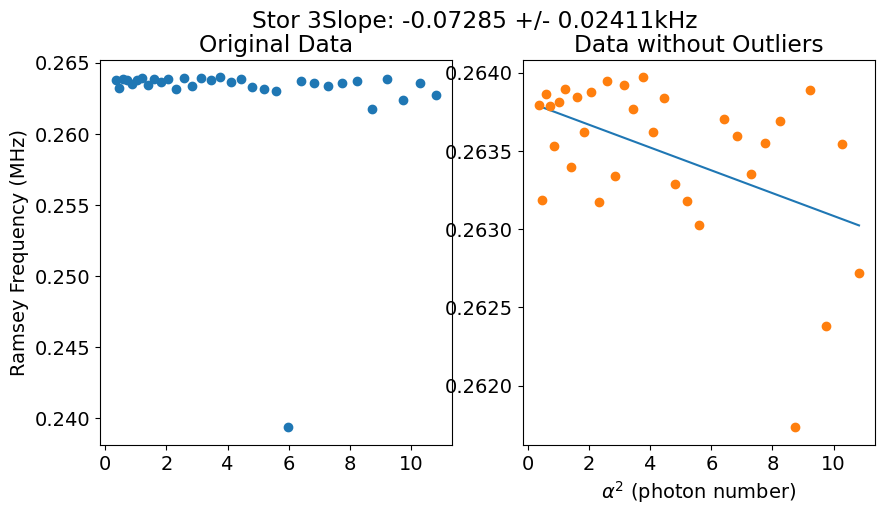

In [321]:
kerr, kerr_err = plot_kerr(freqs, alpha_list_, mode_label = 'Stor 3', center_freq= 0.26, idx_skip = None, idx_end = None)
# this looks weird. Need to revisit the data later


In [ ]:
0.01/0.28

0.03571428571428571

In [322]:
# add a row to the dataframe and save 
file_name='_cavity_ramsey_sweep.h5'
row = [file_list, file_name, 3, expt_path_here, kerr, kerr_err]
kerr_df.loc[len(kerr_df)] = row
kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list                file_name  \
0  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   
1  [1042, 1043, 1044, 1045, 1046, 1047, 1048, 104...  _cavity_ramsey_sweep.h5   
2  [166, 167, 168, 169, 170, 171, 172, 173, 174, ...  _cavity_ramsey_sweep.h5   
3  [333, 334, 335, 336, 337, 338, 339, 340, 341, ...  _cavity_ramsey_sweep.h5   
4  [854, 855, 856, 857, 858, 859, 860, 861, 862, ...  _cavity_ramsey_sweep.h5   
5  [625, 626, 627, 628, 629, 630, 631, 632, 633, ...  _cavity_ramsey_sweep.h5   
6  [1001, 1002, 1003, 1004, 1005, 1006, 1007, 100...  _cavity_ramsey_sweep.h5   

   stor_no                                          expt_path      kerr  \
0        4  H:\Shared drives\SLab\Multimode\experiment\240...  0.297145   
1        5  H:\Shared drives\SLab\Multimode\experiment\240...  0.466322   
2        6  H:\Shared drives\SLab\Multimode\experiment\240...  0.193639   
3        7  H:\Shared drives\SLab\Multimode\experiment\240... -0.047567   
4        2  H:\Shared drives\SLab\Multimode\experiment\240...  0.062168   
5        1  H:\Shared drives\SLab\Multimode\experiment\240...  0.840612   
6        3  H:\Shared drives\SLab\Multimode\experiment\240... -0.072853   

   kerr_err  
0  0.095125  
1  0.034272  
2  0.030144  
3  0.039759  
4  0.018040  
5  0.074634  
6  0.024112

Alpha: 3.2912100000000004
Frequency: 0.2627226321064014, t0: 1.103601695513396


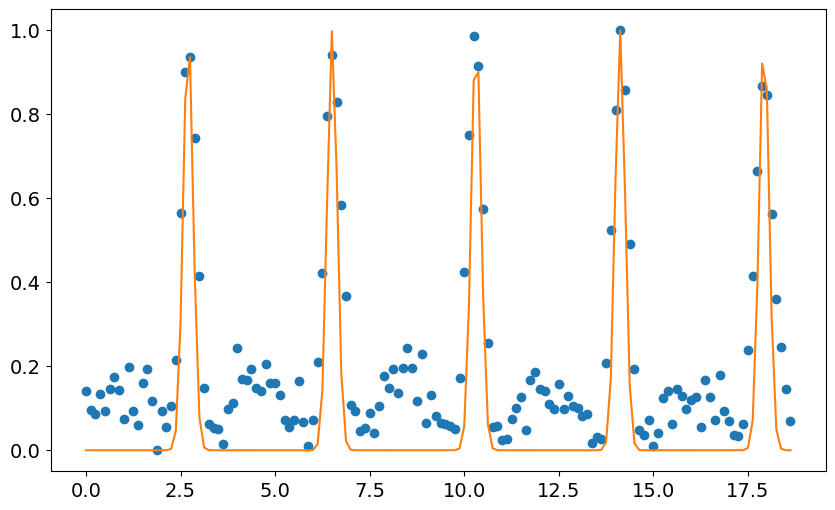

In [319]:
idx = -1

ydata = zlist[idx]
tlist = xlist
omega = 0.5 * 2 *np.pi # MHz 
alpha = alpha_list[idx]
print(f'Alpha: {alpha_list[idx]}')

args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

y_data_final = rescale_ydata(ydata, alpha)
result = fit_to_model(y_data_final, tlist, args, center_freq=0.26, init_f0 = 0.30, init_t0 = 4)
freq, t0 = result
print(f'Frequency: {freq/(2*np.pi)}, t0: {t0}')

plt.plot(tlist, y_data_final, 'o', label='Data')
plt.plot(tlist, small_angle_approx_P0(tlist, args), label='Model')
# print('freq:', result.x[0]/(2*np.pi))

## Storage 4

Gain to alpha: 0.00042195000000000004


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


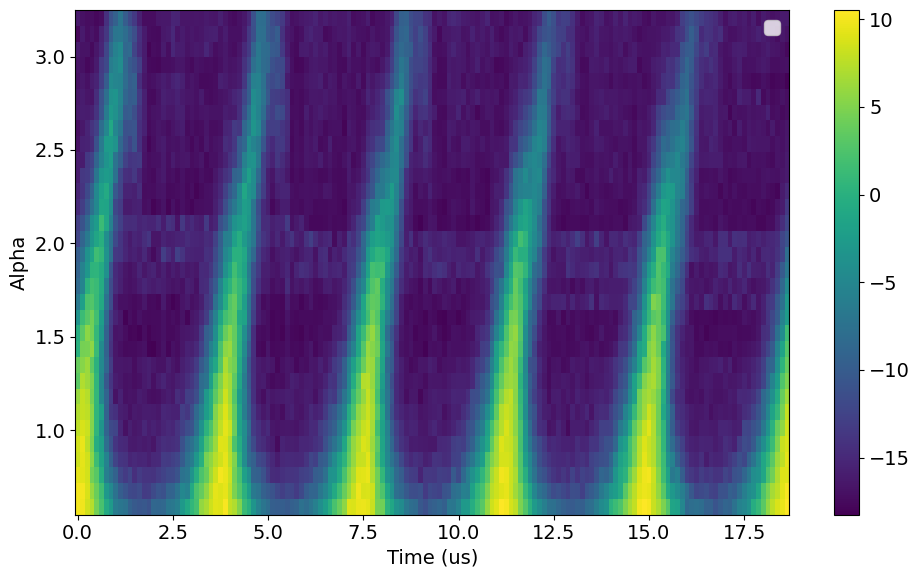

In [324]:
file_list = np.arange(968, 1000, 1)
# file_list = np.arange(148, 162, 1)
expt_path_here = expt_path

xlist, ylist, zlist = plot_raw_Kerr_data(file_list, expt_path = expt_path_here)
alpha_list = ylist

In [325]:
import numpy as np
from scipy.optimize import minimize

freqs, t0s, alpha_list_ = compute_freqs_for_alpha(ylist, xlist, zlist, center_freq=0.27, init_f0 = 0.30, init_t0 = 5)


Alpha: 0.5907300000000001
center_freq: 0.27
Frequency: 1.6927986855104344, t0: 3.7041652163219174
Alpha: 0.67512
center_freq: 0.27
Frequency: 1.6930729835559715, t0: 3.6900257751868115
Alpha: 0.75951
center_freq: 0.27
Frequency: 1.694648611759412, t0: 7.365636746883194
Alpha: 0.8439000000000001
center_freq: 0.27
Frequency: 1.6941438849437875, t0: 7.347285821371642
Alpha: 0.9282900000000001
center_freq: 0.27
Frequency: 1.693133589386711, t0: 3.632278355005726
Alpha: 1.01268
center_freq: 0.27
Frequency: 1.6983874022128602, t0: 7.266524654043234
Alpha: 1.09707
center_freq: 0.27
Frequency: 1.6959268695102128, t0: 3.555012591543685
Alpha: 1.1814600000000002
center_freq: 0.27
Frequency: 1.697222926936323, t0: 7.226737053077299
Alpha: 1.2658500000000001
center_freq: 0.27
Frequency: 1.6971659751027626, t0: 7.197938629520747
Alpha: 1.35024
center_freq: 0.27
Frequency: 1.6719500582334856, t0: 7.391294872151862
Alpha: 1.43463
center_freq: 0.27
Frequency: 1.7002284793759077, t0: 7.085081970749577


In [178]:
freqs[-2]/2/np.pi

0.26523288864343303

Slope: -0.0009537342806238048
Stor 5 Slope: -0.95373 +/- 0.16165kHz


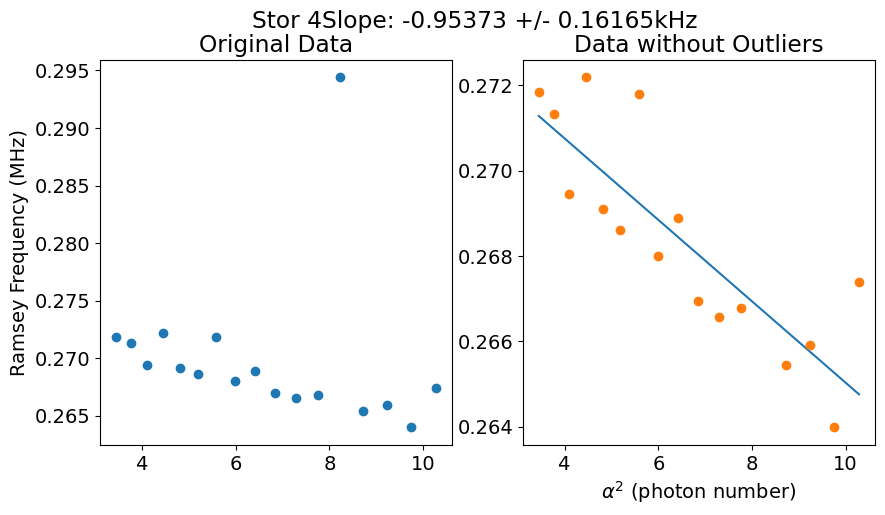

In [329]:
kerr, kerr_err = plot_kerr(freqs, alpha_list_, mode_label = 'Stor 4', center_freq= 0.267, idx_skip=15)
# this looks weird. Need to revisit the data later
# positive slope during initial photon numbers


In [ ]:
0.01/0.28

0.03571428571428571

In [330]:
# add a row to the dataframe and save 
file_name='_cavity_ramsey_sweep.h5'
row = [file_list, file_name, 4, expt_path_here, kerr, kerr_err]
kerr_df.loc[len(kerr_df)] = row
kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list                file_name  \
0  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   
1  [1042, 1043, 1044, 1045, 1046, 1047, 1048, 104...  _cavity_ramsey_sweep.h5   
2  [166, 167, 168, 169, 170, 171, 172, 173, 174, ...  _cavity_ramsey_sweep.h5   
3  [333, 334, 335, 336, 337, 338, 339, 340, 341, ...  _cavity_ramsey_sweep.h5   
4  [854, 855, 856, 857, 858, 859, 860, 861, 862, ...  _cavity_ramsey_sweep.h5   
5  [625, 626, 627, 628, 629, 630, 631, 632, 633, ...  _cavity_ramsey_sweep.h5   
6  [1001, 1002, 1003, 1004, 1005, 1006, 1007, 100...  _cavity_ramsey_sweep.h5   
7  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   
8  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   

   stor_no                                          expt_path      kerr  \
0        4  H:\Shared drives\SLab\Multimode\experiment\240...  0.297145   
1        5  H:\Shared drives\SLab\Multimode\experiment\240...  0.466322   
2        6  H:\Shared drives\SLab\Multimode\experiment\240...  0.193639   
3        7  H:\Shared drives\SLab\Multimode\experiment\240... -0.047567   
4        2  H:\Shared drives\SLab\Multimode\experiment\240...  0.062168   
5        1  H:\Shared drives\SLab\Multimode\experiment\240...  0.840612   
6        3  H:\Shared drives\SLab\Multimode\experiment\240... -0.072853   
7        4  H:\Shared drives\SLab\Multimode\experiment\240... -0.798663   
8        4  H:\Shared drives\SLab\Multimode\experiment\240... -0.953734   

   kerr_err  
0  0.095125  
1  0.034272  
2  0.030144  
3  0.039759  
4  0.018040  
5  0.074634  
6  0.024112  
7  0.115836  
8  0.161654

In [334]:
# delete certain df rows
#kerr_df = kerr_df.drop([0, 7])


kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list                file_name  \
1  [1042, 1043, 1044, 1045, 1046, 1047, 1048, 104...  _cavity_ramsey_sweep.h5   
2  [166, 167, 168, 169, 170, 171, 172, 173, 174, ...  _cavity_ramsey_sweep.h5   
3  [333, 334, 335, 336, 337, 338, 339, 340, 341, ...  _cavity_ramsey_sweep.h5   
4  [854, 855, 856, 857, 858, 859, 860, 861, 862, ...  _cavity_ramsey_sweep.h5   
5  [625, 626, 627, 628, 629, 630, 631, 632, 633, ...  _cavity_ramsey_sweep.h5   
6  [1001, 1002, 1003, 1004, 1005, 1006, 1007, 100...  _cavity_ramsey_sweep.h5   
8  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   

   stor_no                                          expt_path      kerr  \
1        5  H:\Shared drives\SLab\Multimode\experiment\240...  0.466322   
2        6  H:\Shared drives\SLab\Multimode\experiment\240...  0.193639   
3        7  H:\Shared drives\SLab\Multimode\experiment\240... -0.047567   
4        2  H:\Shared drives\SLab\Multimode\experiment\240...  0.062168   
5        1  H:\Shared drives\SLab\Multimode\experiment\240...  0.840612   
6        3  H:\Shared drives\SLab\Multimode\experiment\240... -0.072853   
8        4  H:\Shared drives\SLab\Multimode\experiment\240... -0.953734   

   kerr_err  
1  0.034272  
2  0.030144  
3  0.039759  
4  0.018040  
5  0.074634  
6  0.024112  
8  0.161654

Alpha: 2.86926
Frequency: 0.26780608171216697, t0: 6.432920063797432


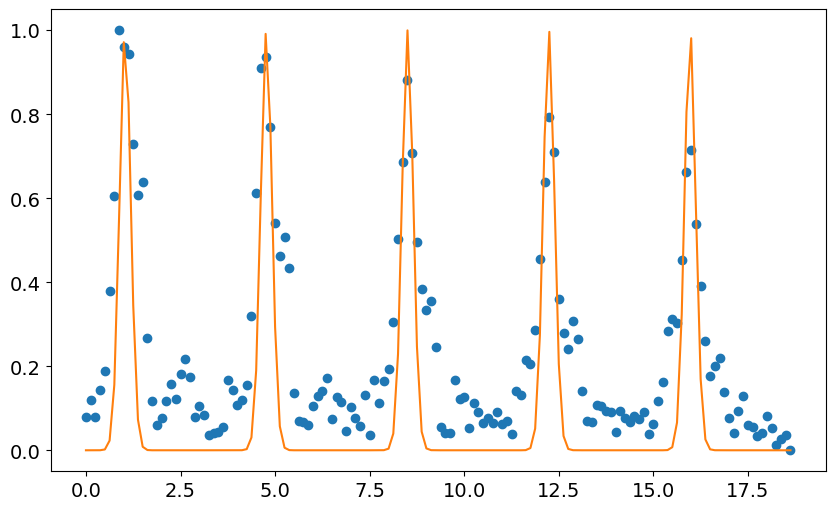

In [166]:
idx = -5

ydata = zlist[idx]
tlist = xlist
omega = 0.5 * 2 *np.pi # MHz 
alpha = alpha_list[idx]
print(f'Alpha: {alpha_list[idx]}')

args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

y_data_final = rescale_ydata(ydata, alpha)
result = fit_to_model(y_data_final, tlist, args, center_freq=0.265, init_f0 = 0.30, init_t0 = 5)
freq, t0 = result
print(f'Frequency: {freq/(2*np.pi)}, t0: {t0}')

plt.plot(tlist, y_data_final, 'o', label='Data')
plt.plot(tlist, small_angle_approx_P0(tlist, args), label='Model')
# print('freq:', result.x[0]/(2*np.pi))

## Storage 5

Gain to alpha: 0.00095481


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


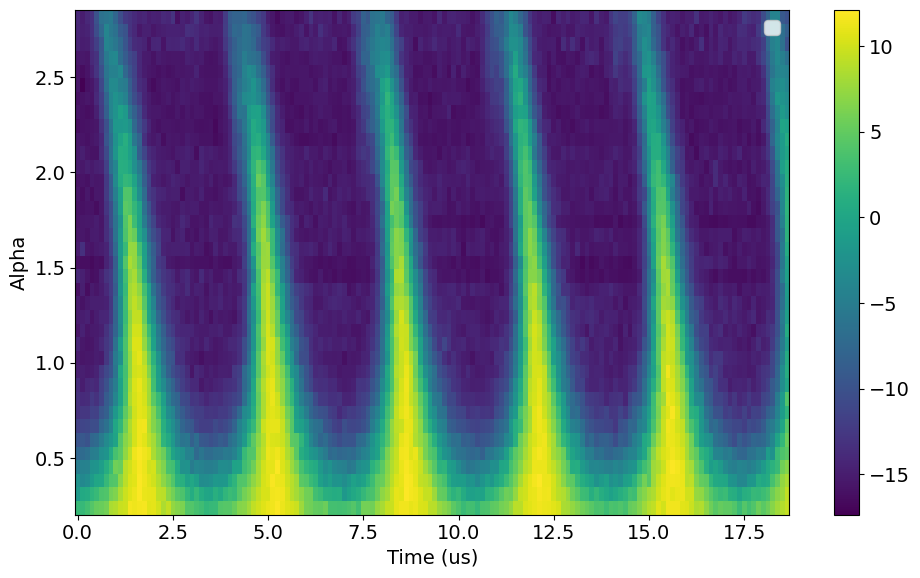

In [181]:
file_list = np.arange(1042, 1079, 1)
# file_list = np.arange(148, 162, 1)
expt_path_here = expt_path

xlist, ylist, zlist = plot_raw_Kerr_data(file_list, expt_path = expt_path_here)
alpha_list = ylist

In [182]:
import numpy as np
from scipy.optimize import minimize

freqs, t0s, alpha_list_ = compute_freqs_for_alpha(ylist, xlist, zlist, center_freq=0.28, init_f0 = 0.30, init_t0 = 27)


Alpha: 0.23870249999999998
center_freq: 0.28
Frequency: 1.8002547226587378, t0: 29.72888822274595
Alpha: 0.31031325
center_freq: 0.28
Frequency: 1.8038628318149363, t0: 29.638215532586358
Alpha: 0.381924
center_freq: 0.28
Frequency: 1.8025389366823361, t0: 29.672916053988256
Alpha: 0.45353475
center_freq: 0.28
Frequency: 1.7967147633933978, t0: 29.8054913809034
Alpha: 0.5251454999999999
center_freq: 0.28
Frequency: 1.7997438042242586, t0: 29.739932979306804
Alpha: 0.59675625
center_freq: 0.28
Frequency: 1.799015976279204, t0: 29.767823488743147
Alpha: 0.6683669999999999
center_freq: 0.28
Frequency: 1.7990445702959512, t0: 29.77235184712522
Alpha: 0.73997775
center_freq: 0.28
Frequency: 1.801244961437834, t0: 29.737318411379643
Alpha: 0.8115884999999999
center_freq: 0.28
Frequency: 1.7992376321350871, t0: 29.782705592349902
Alpha: 0.88319925
center_freq: 0.28
Frequency: 1.798371582322607, t0: 29.825987319087943
Alpha: 0.9548099999999999
center_freq: 0.28
Frequency: 1.8002922014534588, t

In [183]:
freqs[-2]/2/np.pi

0.29959485350811643

Slope: 0.00046632193915513204
Stor 5 Slope: 0.46632 +/- 0.03427kHz


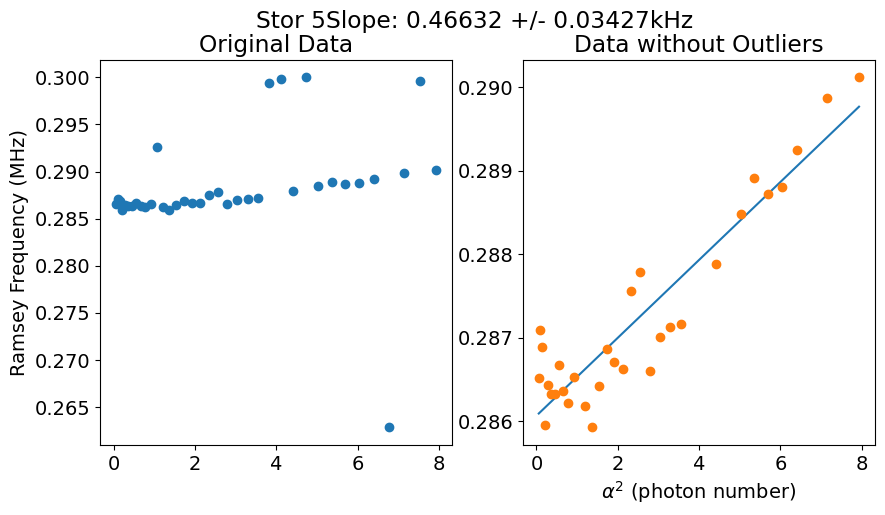

In [184]:
kerr, kerr_err = plot_kerr(freqs, alpha_list_, mode_label = 'Stor 5', center_freq= 0.28)


In [135]:
0.01/0.28

0.03571428571428571

In [185]:
# add a row to the dataframe and save 
file_name='_cavity_ramsey_sweep.h5'
row = [file_list, file_name, 5, expt_path_here, kerr, kerr_err]
kerr_df.loc[len(kerr_df)] = row
kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list                file_name  \
0  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   
1  [1042, 1043, 1044, 1045, 1046, 1047, 1048, 104...  _cavity_ramsey_sweep.h5   

   stor_no                                          expt_path      kerr  \
0        4  H:\Shared drives\SLab\Multimode\experiment\240...  0.297145   
1        5  H:\Shared drives\SLab\Multimode\experiment\240...  0.466322   

   kerr_err  
0  0.095125  
1  0.034272

Alpha: 2.31541425
Frequency: 0.28891545317486766, t0: 29.94944290409596


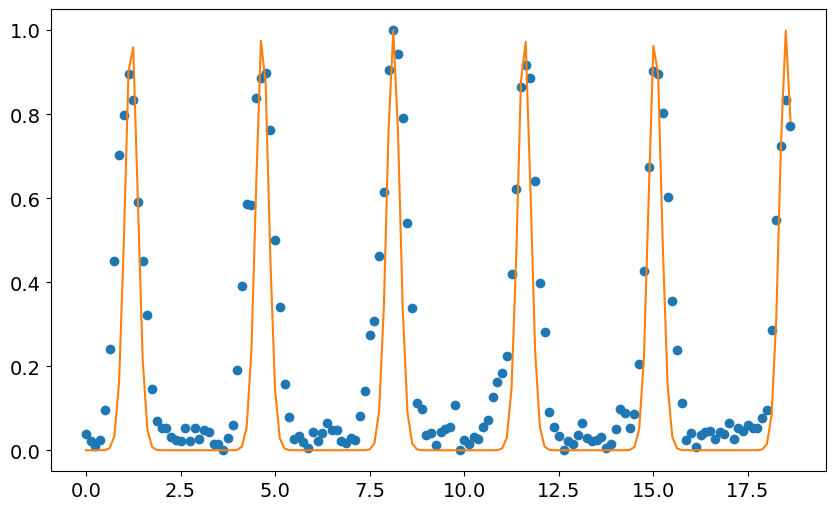

In [127]:
idx = -8

ydata = zlist[idx]
tlist = xlist
omega = 0.5 * 2 *np.pi # MHz 
alpha = alpha_list[idx]
print(f'Alpha: {alpha_list[idx]}')

args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

y_data_final = rescale_ydata(ydata, alpha)
result = fit_to_model(y_data_final, tlist, args, center_freq=0.28, init_f0 = 0.30, init_t0 = 27)
freq, t0 = result
print(f'Frequency: {freq/(2*np.pi)}, t0: {t0}')

plt.plot(tlist, y_data_final, 'o', label='Data')
plt.plot(tlist, small_angle_approx_P0(tlist, args), label='Model')
# print('freq:', result.x[0]/(2*np.pi))

## Storage 6

Gain to alpha: 0.00042843


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


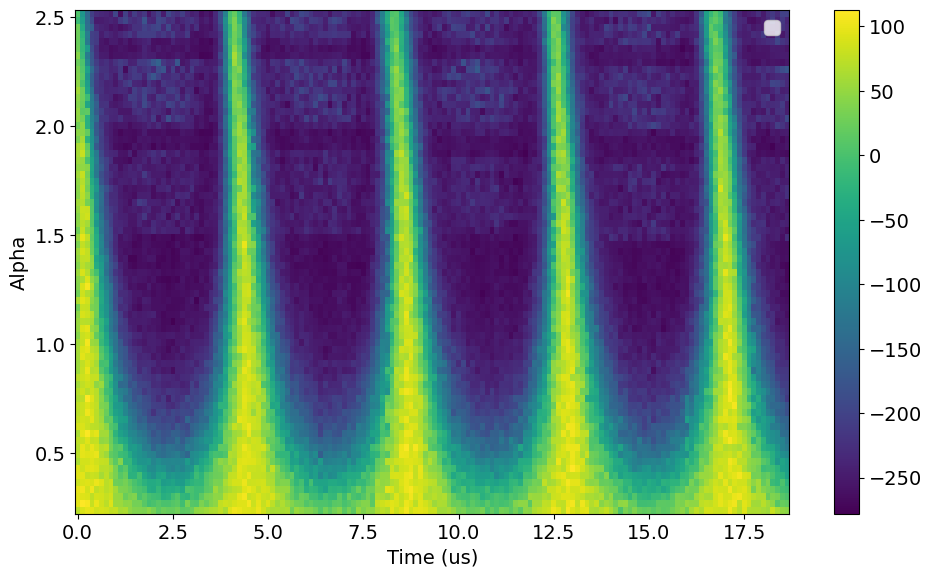

In [186]:
file_list = np.arange(166, 238, 1)
# file_list = np.arange(148, 162, 1)
expt_path_here = expt_path_new
xlist, ylist, zlist = plot_raw_Kerr_data(file_list, expt_path = expt_path_here)
alpha_list = ylist

In [187]:
import numpy as np
from scipy.optimize import minimize

freqs, t0s, alpha_list_ = compute_freqs_for_alpha(alpha_list, xlist, zlist, center_freq=0.23, init_f0 = 0.24, init_t0 = 10)


Alpha: 0.2356365
center_freq: 0.23
Frequency: 1.4894757617407504, t0: 8.174784185065416
Alpha: 0.26776875
center_freq: 0.23
Frequency: 1.4877029506453048, t0: 8.210595716883574
Alpha: 0.299901
center_freq: 0.23
Frequency: 1.4921561659362137, t0: 8.118007635437715
Alpha: 0.33203325
center_freq: 0.23
Frequency: 1.4922421361680214, t0: 8.120999899574185
Alpha: 0.3641655
center_freq: 0.23
Frequency: 1.5006942753363541, t0: 8.021261290998948
Alpha: 0.39629775
center_freq: 0.23
Frequency: 1.4899685936245353, t0: 8.198102614781018
Alpha: 0.42843
center_freq: 0.23
Frequency: 1.4931025146051982, t0: 8.12198253423628
Alpha: 0.46056225
center_freq: 0.23
Frequency: 1.4837270278615922, t0: 4.0064631993077935
Alpha: 0.4926945
center_freq: 0.23
Frequency: 1.490834545606151, t0: 3.9120078001558247
Alpha: 0.52482675
center_freq: 0.23
Frequency: 1.4937223908014894, t0: 12.316267933618033
Alpha: 0.556959
center_freq: 0.23
Frequency: 1.4934101891675187, t0: 8.127372590573115
Alpha: 0.58909125
center_freq:

Slope: 0.00019363909005218948
Stor 5 Slope: 0.19364 +/- 0.03014kHz


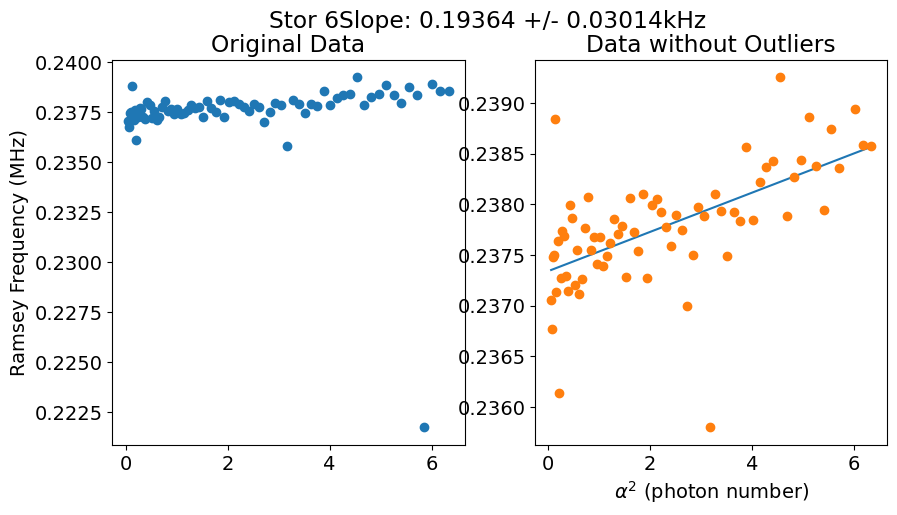

In [188]:
kerr, kerr_err = plot_kerr(freqs, alpha_list_, mode_label = 'Stor 6', center_freq= 0.237)


In [189]:
# add a row to the dataframe and save 
file_name='_cavity_ramsey_sweep.h5'
row = [file_list, file_name, 6, expt_path_here, kerr, kerr_err]
kerr_df.loc[len(kerr_df)] = row
kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list                file_name  \
0  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   
1  [1042, 1043, 1044, 1045, 1046, 1047, 1048, 104...  _cavity_ramsey_sweep.h5   
2  [166, 167, 168, 169, 170, 171, 172, 173, 174, ...  _cavity_ramsey_sweep.h5   

   stor_no                                          expt_path      kerr  \
0        4  H:\Shared drives\SLab\Multimode\experiment\240...  0.297145   
1        5  H:\Shared drives\SLab\Multimode\experiment\240...  0.466322   
2        6  H:\Shared drives\SLab\Multimode\experiment\240...  0.193639   

   kerr_err  
0  0.095125  
1  0.034272  
2  0.030144

Alpha: 0.556959
min_value_model: 0.28914895433541876
Initial Frequency: 0.22840845056908105
Frequency: 0.3
Initial Frequency: 0.2268169011381621
Frequency: 0.3
Initial Frequency: 0.22522535170724314
Frequency: 0.3
Initial Frequency: 0.22363380227632418
Frequency: 0.3
Initial Frequency: 0.22204225284540524
Frequency: 0.3
Initial Frequency: 0.22045070341448628
Frequency: 0.3
Initial Frequency: 0.2188591539835673
Frequency: 0.3
Initial Frequency: 0.21726760455264837
Frequency: 0.3
Initial Frequency: 0.2156760551217294
Frequency: 0.3
Initial Frequency: 0.21408450569081044
Frequency: 0.3
Initial Frequency: 0.2124929562598915
Frequency: 0.3
Initial Frequency: 0.21090140682897254
Frequency: 0.3
Initial Frequency: 0.2093098573980536
Frequency: 0.3
Initial Frequency: 0.20771830796713464
Frequency: 0.3
Initial Frequency: 0.20612675853621568
Frequency: 0.3
Initial Frequency: 0.20453520910529674
Frequency: 0.3
Initial Frequency: 0.20294365967437777
Frequency: 0.3
Initial Frequency: 0.2013521102434

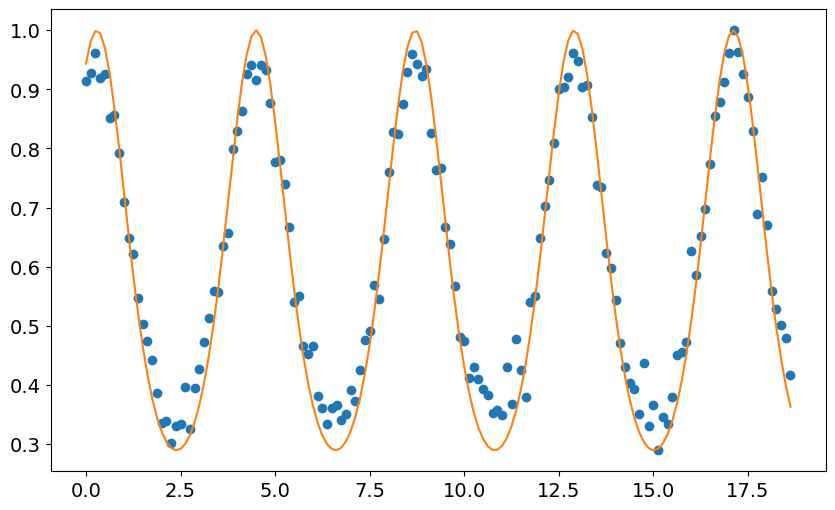

In [50]:
idx = 10

ydata = zlist[idx]
tlist = xlist
omega = 0.5 * 2 *np.pi # MHz 
alpha = alpha_list[idx]
print(f'Alpha: {alpha_list[idx]}')

args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

y_data_final = rescale_ydata(ydata, alpha)
result = fit_to_model(y_data_final, tlist, args, center_freq=0.23, init_f0 = 0.23, init_t0 = 10)
freq, t0 = result
print(f'Frequency: {freq}, t0: {t0}')

plt.plot(tlist, y_data_final, 'o', label='Data')
plt.plot(tlist, small_angle_approx_P0(tlist, args), label='Model')
# print('freq:', result.x[0]/(2*np.pi))

## Storage 7

## Storage 7

Gain to alpha: 0.00042843


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


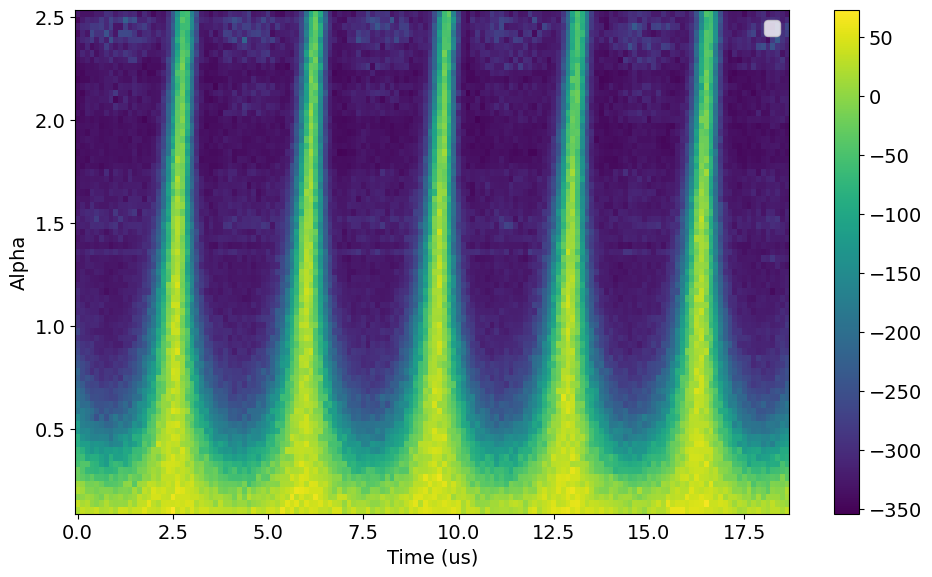

In [335]:
file_list = np.arange(333, 409, 1)
# file_list = np.arange(148, 162, 1)
expt_path_here = expt_path_new

xlist, ylist, zlist = plot_raw_Kerr_data(file_list, expt_path = expt_path_here)
alpha_list = ylist

In [336]:
import numpy as np
from scipy.optimize import minimize

freqs, t0s, alpha_list_ = compute_freqs_for_alpha(ylist, xlist, zlist, center_freq=0.285, init_f0 = 0.31, init_t0 = 27)


Alpha: 0.1071075
center_freq: 0.285
Frequency: 1.895002525470127, t0: 27.04243523478867
Alpha: 0.13923975
center_freq: 0.285
Frequency: 1.8260283942887343, t0: 28.456102370415664
Alpha: 0.171372
center_freq: 0.285
Frequency: 1.8403116497801189, t0: 31.656197396960863
Alpha: 0.20350425
center_freq: 0.285
Frequency: 1.8426834088277717, t0: 28.132242174504718
Alpha: 0.2356365
center_freq: 0.285
Frequency: 1.8282523104216086, t0: 31.78653563529828
Alpha: 0.26776875
center_freq: 0.285
Frequency: 1.8352820494276068, t0: 24.839020673661853
Alpha: 0.299901
center_freq: 0.285
Frequency: 1.8256984712348323, t0: 21.587551737644898
Alpha: 0.33203325
center_freq: 0.285
Frequency: 1.8247947415136307, t0: 21.61168476196116
Alpha: 0.3641655
center_freq: 0.285
Frequency: 1.8210679733253092, t0: 21.660407118717206
Alpha: 0.39629775
center_freq: 0.285
Frequency: 1.8221156490210533, t0: 28.540675080145068
Alpha: 0.42843
center_freq: 0.285
Frequency: 1.8311980263359728, t0: 21.483382836539153
Alpha: 0.4605

In [337]:
freqs[-2]/2/np.pi

0.2897437172781539

Slope: -3.5511173092408305e-05
Stor 5 Slope: -0.03551 +/- 0.03532kHz


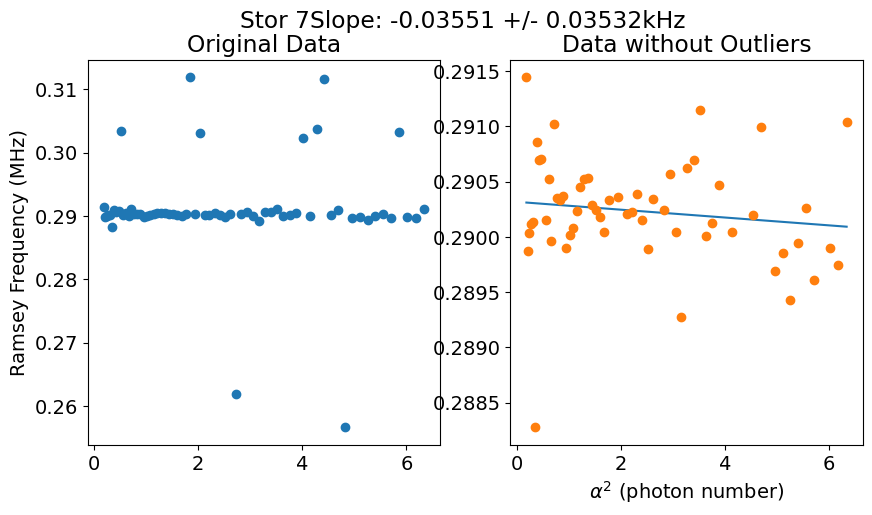

In [338]:
kerr, kerr_err = plot_kerr(freqs, alpha_list_, mode_label = 'Stor 7', center_freq= 0.29, idx_skip = 10, idx_end = None)


In [ ]:
0.01/0.28

0.03571428571428571

In [245]:
# add a row to the dataframe and save 
file_name='_cavity_ramsey_sweep.h5'
row = [file_list, file_name, 7, expt_path_here, kerr, kerr_err]
kerr_df.loc[len(kerr_df)] = row
kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list                file_name  \
0  [968, 969, 970, 971, 972, 973, 974, 975, 976, ...  _cavity_ramsey_sweep.h5   
1  [1042, 1043, 1044, 1045, 1046, 1047, 1048, 104...  _cavity_ramsey_sweep.h5   
2  [166, 167, 168, 169, 170, 171, 172, 173, 174, ...  _cavity_ramsey_sweep.h5   
3  [333, 334, 335, 336, 337, 338, 339, 340, 341, ...  _cavity_ramsey_sweep.h5   

   stor_no                                          expt_path      kerr  \
0        4  H:\Shared drives\SLab\Multimode\experiment\240...  0.297145   
1        5  H:\Shared drives\SLab\Multimode\experiment\240...  0.466322   
2        6  H:\Shared drives\SLab\Multimode\experiment\240...  0.193639   
3        7  H:\Shared drives\SLab\Multimode\experiment\240... -0.047567   

   kerr_err  
0  0.095125  
1  0.034272  
2  0.030144  
3  0.039759

Alpha: 2.484894
Frequency: 0.2897437172781539, t0: 28.27604461577632


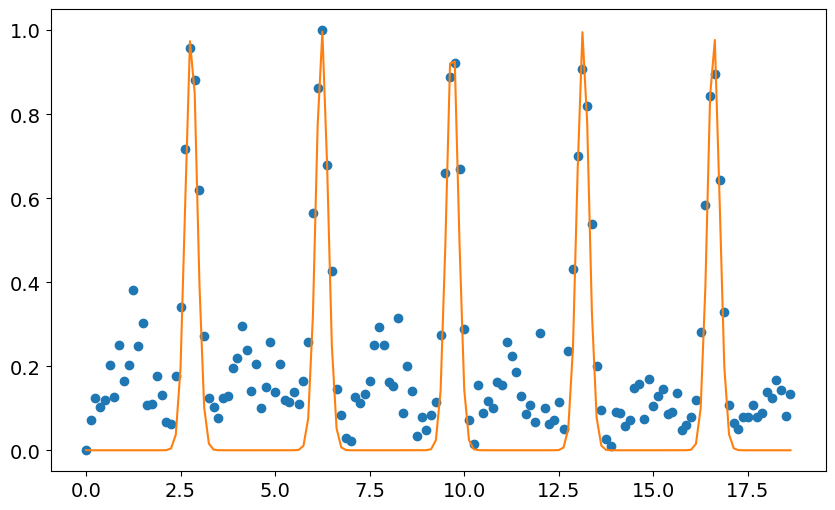

In [340]:
idx = -2

ydata = zlist[idx]
tlist = xlist
omega = 0.5 * 2 *np.pi # MHz 
alpha = alpha_list[idx]
print(f'Alpha: {alpha_list[idx]}')

args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

y_data_final = rescale_ydata(ydata, alpha)
result = fit_to_model(y_data_final, tlist, args, center_freq=0.285, init_f0 = 0.31, init_t0 = 27)
freq, t0 = result
print(f'Frequency: {freq/(2*np.pi)}, t0: {t0}')

plt.plot(tlist, y_data_final, 'o', label='Data')
plt.plot(tlist, small_angle_approx_P0(tlist, args), label='Model')
# print('freq:', result.x[0]/(2*np.pi))

Gain to alpha: 0.00042843


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


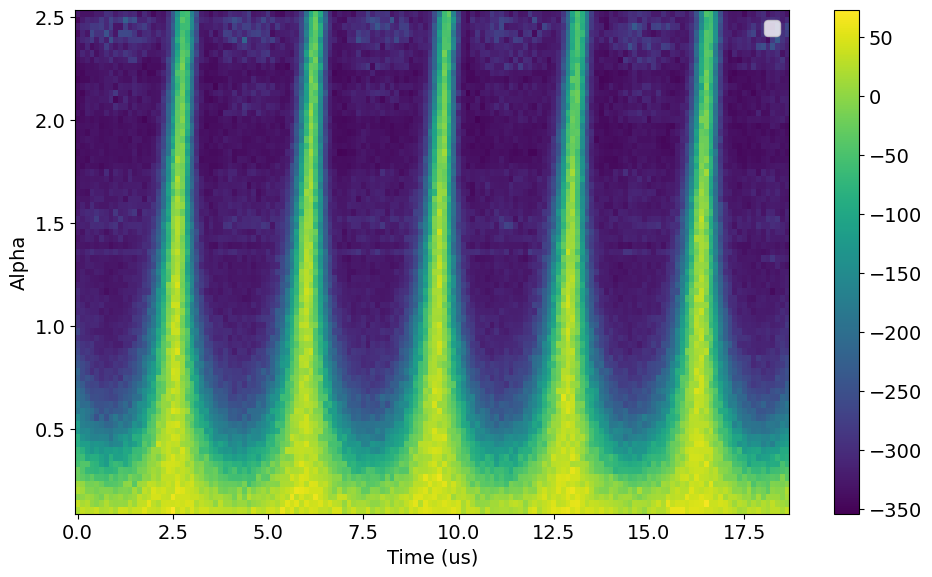

In [213]:
file_list = np.arange(333, 409, 1)
# file_list = np.arange(148, 162, 1)

expt_path_here = expt_path_new
xlist, ylist, zlist = plot_raw_Kerr_data(file_list, expt_path = expt_path_here)

In [214]:
import numpy as np
from scipy.optimize import minimize

freqs, t0s, alpha_list_ = compute_freqs_for_alpha(alpha_list, xlist, zlist)


Alpha: 0.5907300000000001
center_freq: 0.23
Frequency: 1.3473818694592556, t0: 2.276737969793673
Alpha: 0.67512
center_freq: 0.23
Frequency: 1.3430570505457695, t0: 2.250090513490303
Alpha: 0.75951
center_freq: 0.23
Frequency: 1.3461893722151703, t0: 10.66625009070905
Alpha: 0.8439000000000001
center_freq: 0.23
Frequency: 1.43694724233804, t0: 10.869620940903136
Alpha: 0.9282900000000001
center_freq: 0.23
Frequency: 1.3214362974332396, t0: 11.603660417282054
Alpha: 1.01268
center_freq: 0.23
Frequency: 1.357725750390981, t0: 16.049403668698446
Alpha: 1.09707
center_freq: 0.23
Frequency: 1.3376999541062662, t0: 11.687715925930759
Alpha: 1.1814600000000002
center_freq: 0.23
Frequency: 1.539958318180373, t0: 10.000338139910237
Alpha: 1.2658500000000001
center_freq: 0.23
Frequency: 1.3495202140800935, t0: 2.0953155824756635
Alpha: 1.35024
center_freq: 0.23
Frequency: 1.4178154760683657, t0: 9.981716981610374
Alpha: 1.43463
center_freq: 0.23
Frequency: 1.3359145396570271, t0: 11.771147370867

KeyboardInterrupt: 

In [ ]:
kerr, kerr_err = plot_kerr(freqs, alpha_list_, mode_label = 'Stor 6')


In [ ]:
# add a row to the dataframe and save 
row = [file_list, 'Storage 6', kerr, kerr_err]
kerr_df.loc[len(kerr_df)] = row
kerr_df.to_csv(kerr_file_path, index=False)
kerr_df

file_list  file_name      kerr  \
0  [166, 167, 168, 169, 170, 171, 172, 173, 174, ...  Storage 6  0.272053   

   kerr_err  
0  0.050577

Alpha: 2.4473100000000003
Frequency: 1.81631048210046, t0: 11.13919608277369


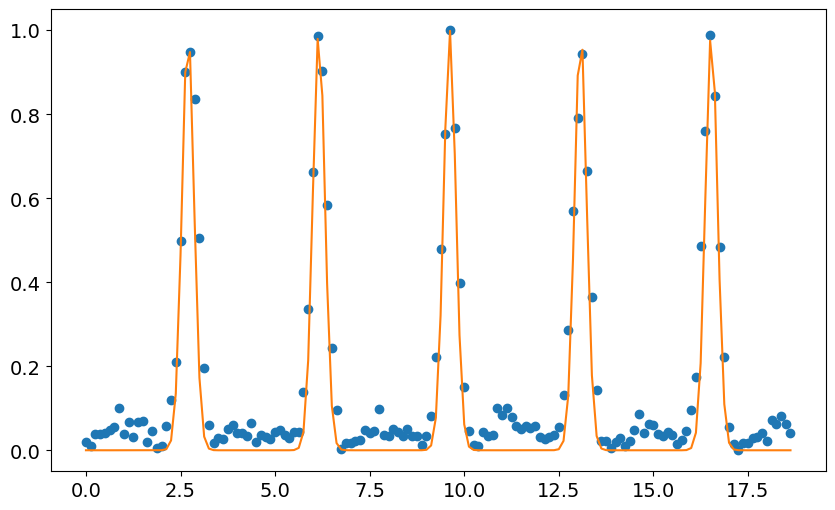

In [217]:
idx = -10

ydata = zlist[idx]
tlist = xlist
omega = 0.5 * 2 *np.pi # MHz 
alpha = alpha_list[idx]
print(f'Alpha: {alpha_list[idx]}')

args = {'alpha': alpha, 'omega': omega, 't0': 0.3}

y_data_final = rescale_ydata(ydata, alpha)
result = fit_to_model(y_data_final, tlist, args, center_freq=0.28, init_f0 = 0.3, init_t0 = 10)
freq, t0 = result
print(f'Frequency: {freq  /}, t0: {t0}')

plt.plot(tlist, y_data_final, 'o', label='Data')
plt.plot(tlist, small_angle_approx_P0(tlist, args), label='Model')
# print('freq:', result.x[0]/(2*np.pi))